# $B+ -> \Lambda \bar{p} K+ K+$

In [109]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import vector  ## added by mds
import awkward as ak
import iminuit
from iminuit import Minuit
from fit_classes import *
from utils import *
import mplhep as hep

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Use LHCb style for plots
#import mplhep as hep
#plt.style.use(hep.style.CMS)
#plt.rcParams["figure.figsize"] = (8,6)
#plt.rcParams['font.family'] = 'DejaVu Sans' # Change 'DejaVu Sans' to a font installed on your system


Run the following regardless of data choice

In [4]:
rd_data = load_rd_data(base_path='/share/lazy/Bu2LambdaPHH/NTuples/RD/', decay_type ='B2L0pbarKpKp')


In [12]:
selected_mc_types = ['MCB2L0PbarKpKp']
mc_data = load_mc_data(base_path='/share/lazy/Bu2LambdaPHH/NTuples/MC', selected_mc_types=selected_mc_types, decay_tree='MCB2L0pbarKpKp')

In [9]:
load_mc_data(base_path='/share/lazy/Bu2LambdaPHH/NTuples/MC', list_decay_types=True)

Available MC types:
1. MCBs2L0barPDsm,KKPi
2. MCBu2JpsiK,PL0barK
3. MCBu2chic2K
4. MCBu2LcbarPPi,Sigma0barPiPi0
5. MCBs2L0barPDssm,Dsgamma,KKPi
6. MCBu2L0barLambda1520K,PK
7. MCBu2L0barPD0bar,KPiPi0
8. MCBd2LcbarL0K,PKPi
9. MCBu2LcbarPPi,Sigma0barPi
10. MCB2L0barPPipPip
11. MCBd2L0barPDm,KKPi
12. MCBu2L0barPeta,PiPiX
13. MCBu2chic0K
14. MCBu2LcbarPPi,L0barPim
15. MCB2L0barPJpsi,PPbar
16. MCB2L0barPKpPim
17. MCBu2L0barPetaP
18. MCB2L0barPKpKm
19. MCB2L0barPKmPip
20. MCBu2Psi2SK
21. MCBd2L0barPDm,KPiPi
22. MCBu2L0barPPhi,KK
23. MCBd2LcPiPiP,L0barPi
24. MCB2L0PbarKpKp
25. MCBd2L0barPDsm,KKPi
26. MCB2PPbarPPbarPip
27. MCB2L0PbarKpPip
28. MCB2L0barPPipPim
29. MCB2L0barPPbarP
30. MCBu2chic1K
31. MCBu2L0barPD0bar,KPi
32. MCBu2etacK,PL0barK
33. MCBu2LcbarPPi,L0barPiPi0
Not all files have the same decay types.
File /share/lazy/Bu2LambdaPHH/NTuples/MC/MCB2L0barPJpsi,PPbar_15MD.root has the decay types:
B2L0barppbarp
B2L0barpKpKm
File /share/lazy/Bu2LambdaPHH/NTuples/MC/MCB2L0barPJpsi,PPbar_15MU.

In [6]:
arrs_rd = uproot.concatenate(rd_data)
print("Concantenated arrays are ready:")
print(f"Number of events: {len(arrs_rd)}")
#print(f"Number of variables: {len(arrs_rd[0])}")


Concantenated arrays are ready:
Number of events: 11705


In [13]:
arrs_mc = uproot.concatenate(mc_data)
print("MC Concantenated arrays are ready:")
print(f"MC Number of events: {len(arrs_mc)}")


FileNotFoundError: file not found

    []

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [14]:
# Define variables for real data
h1_P = arrs_rd['h1_P']
h1_PT = arrs_rd['h1_PT']
h1_PE = arrs_rd['h1_PE']
h1_PX = arrs_rd['h1_PX']
h1_PY = arrs_rd['h1_PY']
h1_PZ = arrs_rd['h1_PZ']
h1_ID = arrs_rd['h1_ID']
h1_TRACK_Type = arrs_rd['h1_TRACK_Type']
h2_P = arrs_rd['h2_P']
h2_PT = arrs_rd['h2_PT']
h2_PE = arrs_rd['h2_PE']
h2_PX = arrs_rd['h2_PX']
h2_PY = arrs_rd['h2_PY']
h2_PZ = arrs_rd['h2_PZ']
h2_ID = arrs_rd['h2_ID']
h2_TRACK_Type = arrs_rd['h2_TRACK_Type']
p_P = arrs_rd['p_P']
p_PT = arrs_rd['p_PT']
p_PE = arrs_rd['p_PE']
p_PX = arrs_rd['p_PX']
p_PY = arrs_rd['p_PY']
p_PZ = arrs_rd['p_PZ']
p_ID = arrs_rd['p_ID']
p_TRACK_Type = arrs_rd['p_TRACK_Type']
Lp_P = arrs_rd['Lp_P']
Lp_PT = arrs_rd['Lp_PT']
Lp_PE = arrs_rd['Lp_PE']
Lp_PX = arrs_rd['Lp_PX']
Lp_PY = arrs_rd['Lp_PY']
Lp_PZ = arrs_rd['Lp_PZ']
Lp_ID = arrs_rd['Lp_ID']
Lp_TRACK_Type = arrs_rd['Lp_TRACK_Type']
Lp_ProbNNp = arrs_rd['Lp_ProbNNp']
LL = (3 == Lp_TRACK_Type)
DD = (5 == Lp_TRACK_Type)
Lpi_P = arrs_rd['Lpi_P']
Lpi_PT = arrs_rd['Lpi_PT']
Lpi_PE = arrs_rd['Lpi_PE']
Lpi_PX = arrs_rd['Lpi_PX']
Lpi_PY = arrs_rd['Lpi_PY']
Lpi_PZ = arrs_rd['Lpi_PZ']
Lpi_ID = arrs_rd['Lpi_ID']
Lpi_TRACK_Type = arrs_rd['Lpi_TRACK_Type']
Lpi_ProbNNpi = arrs_rd['Lpi_ProbNNpi']
L0_P = arrs_rd['L0_P']
L0_PT = arrs_rd['L0_PT']
L0_PE = arrs_rd['L0_PE']
L0_PX = arrs_rd['L0_PX']
L0_PY = arrs_rd['L0_PY']
L0_PZ = arrs_rd['L0_PZ']
L0_ID = arrs_rd['L0_ID']
L0_MM = arrs_rd['L0_MM']
L0_DOCA12 = arrs_rd['L0_DOCA12']



In [ ]:
# Define variables for Monte Carlo data
h1_P_mc = arrs_mc['h1_P']
h1_PT_mc = arrs_mc['h1_PT']
h1_PE_mc = arrs_mc['h1_PE']
h1_PX_mc = arrs_mc['h1_PX']
h1_PY_mc = arrs_mc['h1_PY']
h1_PZ_mc = arrs_mc['h1_PZ']
h1_ID_mc = arrs_mc['h1_ID']
h1_TRACK_Type_mc = arrs_mc['h1_TRACK_Type']
h2_P_mc = arrs_mc['h2_P']
h2_PT_mc = arrs_mc['h2_PT']
h2_PE_mc = arrs_mc['h2_PE']
h2_PX_mc = arrs_mc['h2_PX']
h2_PY_mc = arrs_mc['h2_PY']
h2_PZ_mc = arrs_mc['h2_PZ']
h2_ID_mc = arrs_mc['h2_ID']
h2_TRACK_Type_mc = arrs_mc['h2_TRACK_Type']
p_P_mc = arrs_mc['p_P']
p_PT_mc = arrs_mc['p_PT']
p_PE_mc = arrs_mc['p_PE']
p_PX_mc = arrs_mc['p_PX']
p_PY_mc = arrs_mc['p_PY']
p_PZ_mc = arrs_mc['p_PZ']
p_ID_mc = arrs_mc['p_ID']
p_TRACK_Type_mc = arrs_mc['p_TRACK_Type']
Lp_P_mc = arrs_mc['Lp_P']
Lp_PT_mc = arrs_mc['Lp_PT']
Lp_PE_mc = arrs_mc['Lp_PE']
Lp_PX_mc = arrs_mc['Lp_PX']
Lp_PY_mc = arrs_mc['Lp_PY']
Lp_PZ_mc = arrs_mc['Lp_PZ']
Lp_ID_mc = arrs_mc['Lp_ID']
Lp_TRACK_Type_mc = arrs_mc['Lp_TRACK_Type']
Lp_ProbNNp_mc = arrs_mc['Lp_ProbNNp']
LL_mc = (3 == Lp_TRACK_Type_mc)
DD_mc = (5 == Lp_TRACK_Type_mc)
Lpi_P_mc = arrs_mc['Lpi_P']
Lpi_PT_mc = arrs_mc['Lpi_PT']
Lpi_PE_mc = arrs_mc['Lpi_PE']
Lpi_PX_mc = arrs_mc['Lpi_PX']
Lpi_PY_mc = arrs_mc['Lpi_PY']
Lpi_PZ_mc = arrs_mc['Lpi_PZ']
Lpi_ID_mc = arrs_mc['Lpi_ID']
Lpi_TRACK_Type_mc = arrs_mc['Lpi_TRACK_Type']
Lpi_ProbNNpi_mc = arrs_mc['Lpi_ProbNNpi']
L0_P_mc = arrs_mc['L0_P']
L0_PT_mc = arrs_mc['L0_PT']
L0_PE_mc = arrs_mc['L0_PE']
L0_PX_mc = arrs_mc['L0_PX']
L0_PY_mc = arrs_mc['L0_PY']
L0_PZ_mc = arrs_mc['L0_PZ']
L0_ID_mc = arrs_mc['L0_ID']
L0_MM_mc = arrs_mc['L0_MM']
L0_DOCA12_mc = arrs_mc['L0_DOCA12']

In [15]:
print('Lp_ID = ',Lp_ID)
if np.any(np.bitwise_or(Lp_ID == 2212, Lp_ID == -2212)):
    print('Lp is pi-/+ particles (that should come from Lambda)')
else:
    print('Lp is not pi-/+ particles (that should come from Lambda)')    
print('p_ID = ', p_ID)
if np.any(np.bitwise_or(p_ID == 2212, p_ID == -2212)):
    print('p is p-/+ particles')
else:
    print('p is not p-/+ particles. probably something went wrong')    
print('h1_ID =', h1_ID)
if np.any(np.bitwise_or(h1_ID == 211, h1_ID == -211)):
    print('h1 is pi-/+ particles')
elif np.any(np.bitwise_or(h1_ID == 321, h1_ID == -321)):
    print('h1 is K-/+ particles')
elif np.any(np.bitwise_or(h1_ID == 2212, h1_ID == -2212)):
    print('h1 is p-/+ particles')    
print('h2_ID =', h2_ID)
if np.any(np.bitwise_or(h2_ID == 211, h2_ID == -211)):
    print('h2 is pi-/+ particles')
elif np.any(np.bitwise_or(h2_ID == 321, h2_ID == -321)):
    print('h2 is K-/+ particles')
elif np.any(np.bitwise_or(h2_ID == 2212, h2_ID == -2212)):
    print('h2 is p-/+ particles')        
print('Lpi_ID =', Lpi_ID)
if np.any(np.bitwise_or(Lpi_ID == 211, Lpi_ID == -211)):
    print('Lpi is pi-/+ particles (that should come from Lambda)')
else:
    print('Lpi is not pi-/+ particles (that should come from Lambda)')    
print('L0_ID =', L0_ID)
if np.any(np.bitwise_or(L0_ID == 3122, L0_ID == -3122)):
    print('L0 is Lambda particles')
else:
    print('L0 is not Lambda particles. probably something went wrong')    


Lp_ID =  [-2212, -2212, 2212, -2212, -2212, -2212, ..., -2212, -2212, 2212, -2212, -2212]
Lp is pi-/+ particles (that should come from Lambda)
p_ID =  [2212, 2212, -2212, 2212, 2212, 2212, ..., -2212, 2212, 2212, -2212, 2212, 2212]
p is p-/+ particles
h1_ID = [-321, -321, 321, -321, -321, -321, -321, ..., 321, -321, -321, 321, -321, -321]
h1 is K-/+ particles
h2_ID = [-321, -321, 321, -321, -321, -321, -321, ..., 321, -321, -321, 321, -321, -321]
h2 is K-/+ particles
Lpi_ID = [211, 211, -211, 211, 211, 211, 211, ..., -211, -211, 211, 211, -211, 211, 211]
Lpi is pi-/+ particles (that should come from Lambda)
L0_ID = [-3122, -3122, 3122, -3122, -3122, -3122, ..., -3122, -3122, 3122, -3122, -3122]
L0 is Lambda particles


In [16]:
Bu_FDCHI2_OWNPV = arrs_rd['Bu_FDCHI2_OWNPV']
L0_ENDVERTEX_X = arrs_rd['L0_ENDVERTEX_X'] # The x coordinate of the L0 decay vertex
L0_ENDVERTEX_Y = arrs_rd['L0_ENDVERTEX_Y'] # The y coordinate of the L0 decay vertex
L0_ENDVERTEX_Z = arrs_rd['L0_ENDVERTEX_Z'] # The z coordinate of the L0 decay vertex
L0_ENDVERTEX_XERR = arrs_rd['L0_ENDVERTEX_XERR'] # The error on the x coordinate of the L0 decay vertex
L0_ENDVERTEX_YERR = arrs_rd['L0_ENDVERTEX_YERR'] # The error on the y coordinate of the L0 decay vertex
L0_ENDVERTEX_ZERR = arrs_rd['L0_ENDVERTEX_ZERR'] # The error on the z coordinate of the L0 decay vertex
L0_OWNPV_Z = arrs_rd['L0_OWNPV_Z'] # The z coordinate of the L0 production vertex
L0_OWNPV_ZERR = arrs_rd['L0_OWNPV_ZERR'] # The error on the z coordinate of the L0 production vertex

L0_FD_OWNPV = arrs_rd['L0_FD_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex
L0_FDCHI2_OWNPV = arrs_rd['L0_FDCHI2_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty
Bu_ENDVERTEX_X = arrs_rd['Bu_ENDVERTEX_X'] # The x coordinate of the Bu decay vertex
Bu_ENDVERTEX_Y = arrs_rd['Bu_ENDVERTEX_Y'] # The y coordinate of the Bu decay vertex
Bu_ENDVERTEX_Z = arrs_rd['Bu_ENDVERTEX_Z'] # The z coordinate of the Bu decay vertex
Bu_ENDVERTEX_XERR = arrs_rd['Bu_ENDVERTEX_XERR'] # The error on the x coordinate of the Bu decay vertex
Bu_ENDVERTEX_YERR = arrs_rd['Bu_ENDVERTEX_YERR'] # The error on the y coordinate of the Bu decay vertex
Bu_ENDVERTEX_ZERR = arrs_rd['Bu_ENDVERTEX_ZERR'] # The error on the z coordinate of the Bu decay vertex
Bu_IPCHI2_OWNPV = arrs_rd['Bu_IPCHI2_OWNPV'] # The chi-square of the impact parameter (the distance of closest approach of the particle track to the primary vertex)
Bu_MM = arrs_rd['Bu_MM'] # The invariant mass of the Bu candidate

Bu_DOCA12 = arrs_rd['Bu_DOCA12'] # The distance of closest approach between the two daughters of the Bu candidate
Delta_Z = L0_ENDVERTEX_Z - Bu_ENDVERTEX_Z # The difference in z coordinates between the L0 and Bu decay vertices
Delta_X = L0_ENDVERTEX_X - Bu_ENDVERTEX_X # The difference in x coordinates between the L0 and Bu decay vertices
Delta_Y = L0_ENDVERTEX_Y - Bu_ENDVERTEX_Y # The difference in y coordinates between the L0 and Bu decay vertices
Delta_X_ERR = np.sqrt(np.square(Bu_ENDVERTEX_XERR)+np.square(L0_ENDVERTEX_XERR)) # The error on the difference in x coordinates between the L0 and Bu decay vertices
Delta_Y_ERR = np.sqrt(np.square(Bu_ENDVERTEX_YERR)+np.square(L0_ENDVERTEX_YERR)) # The error on the difference in y coordinates between the L0 and Bu decay vertices
Delta_Z_ERR = np.sqrt(np.square(Bu_ENDVERTEX_ZERR)+np.square(L0_ENDVERTEX_ZERR)) # The error on the difference in z coordinates between the L0 and Bu decay vertices
Delta_X_ERR_sq = np.square(Delta_X_ERR)
Delta_Y_ERR_sq = np.square(Delta_Y_ERR)
Delta_Z_ERR_sq = np.square(Delta_Z_ERR)

delta_x = np.divide(Delta_X,Delta_X_ERR) # The difference in x coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_y = np.divide(Delta_Y,Delta_Y_ERR) # The difference in y coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_z = np.divide(Delta_Z,Delta_Z_ERR) # The difference in z coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
L0_FD_CHISQ = np.square(delta_x) + np.square(delta_y) + np.square(delta_z) # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty



Bu_FDCHI2_OWNPV_mc = arrs_mc['Bu_FDCHI2_OWNPV']
L0_ENDVERTEX_X_mc = arrs_mc['L0_ENDVERTEX_X']
L0_ENDVERTEX_Y_mc = arrs_mc['L0_ENDVERTEX_Y']
L0_ENDVERTEX_Z_mc = arrs_mc['L0_ENDVERTEX_Z']
L0_ENDVERTEX_XERR_mc = arrs_mc['L0_ENDVERTEX_XERR']
L0_ENDVERTEX_YERR_mc = arrs_mc['L0_ENDVERTEX_YERR']
L0_ENDVERTEX_ZERR_mc = arrs_mc['L0_ENDVERTEX_ZERR']
L0_OWNPV_Z_mc = arrs_mc['L0_OWNPV_Z']
L0_OWNPV_ZERR_mc = arrs_mc['L0_OWNPV_ZERR']
L0_FD_OWNPV_mc = arrs_mc['L0_FD_OWNPV']
L0_FDCHI2_OWNPV_mc = arrs_mc['L0_FDCHI2_OWNPV']
Bu_ENDVERTEX_X_mc = arrs_mc['Bu_ENDVERTEX_X']
Bu_ENDVERTEX_Y_mc = arrs_mc['Bu_ENDVERTEX_Y']
Bu_ENDVERTEX_Z_mc = arrs_mc['Bu_ENDVERTEX_Z']
Bu_ENDVERTEX_XERR_mc = arrs_mc['Bu_ENDVERTEX_XERR']
Bu_ENDVERTEX_YERR_mc = arrs_mc['Bu_ENDVERTEX_YERR']
Bu_ENDVERTEX_ZERR_mc = arrs_mc['Bu_ENDVERTEX_ZERR']
Bu_IPCHI2_OWNPV_mc = arrs_mc['Bu_IPCHI2_OWNPV']
Bu_MM_mc = arrs_mc['Bu_MM']
Bu_DOCA12_mc = arrs_mc['Bu_DOCA12']

Delta_Z_mc = L0_ENDVERTEX_Z_mc - Bu_ENDVERTEX_Z_mc
Delta_X_mc = L0_ENDVERTEX_X_mc - Bu_ENDVERTEX_X_mc
Delta_Y_mc = L0_ENDVERTEX_Y_mc - Bu_ENDVERTEX_Y_mc
Delta_X_ERR_mc = np.sqrt(np.square(Bu_ENDVERTEX_XERR_mc)+np.square(L0_ENDVERTEX_XERR_mc))
Delta_Y_ERR_mc = np.sqrt(np.square(Bu_ENDVERTEX_YERR_mc)+np.square(L0_ENDVERTEX_YERR_mc))
Delta_Z_ERR_mc = np.sqrt(np.square(Bu_ENDVERTEX_ZERR_mc)+np.square(L0_ENDVERTEX_ZERR_mc))
Delta_X_ERR_sq_mc = np.square(Delta_X_ERR_mc)
Delta_Y_ERR_sq_mc = np.square(Delta_Y_ERR_mc)
Delta_Z_ERR_sq_mc = np.square(Delta_Z_ERR_mc)

delta_x_mc = np.divide(Delta_X_mc,Delta_X_ERR_mc)
delta_y_mc = np.divide(Delta_Y_mc,Delta_Y_ERR_mc)
delta_z_mc = np.divide(Delta_Z_mc,Delta_Z_ERR_mc)
L0_FD_CHISQ_mc = np.square(delta_x_mc) + np.square(delta_y_mc) + np.square(delta_z_mc)


NameError: name 'arrs_mc' is not defined

In [17]:
h1_probNNk = arrs_rd['h1_MC15TuneV1_ProbNNk']
h2_probNNk = arrs_rd['h2_MC15TuneV1_ProbNNk']
p_ProbNNp  = arrs_rd['p_MC15TuneV1_ProbNNp']


# Lambda Fitting

In this section, we will try fitting different cuts and fits for `L0`, `LO0_LL` and `L0_DD`.

First lets define some cuts that would be useful later

In [18]:


good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_9 = L0_FD_CHISQ>9.
good_Lambda_sep_9 =  good_Delta_Z & good_Lambda_chisq_9
bad_Delta_Z = Delta_Z<0.
bad_Lambda_chisq_9  = L0_FD_CHISQ<9.
bad_Lambda_sep_9 =  bad_Delta_Z | bad_Lambda_chisq_9
good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_100  = L0_FD_CHISQ>100.
good_Lambda_sep_100 =  good_Delta_Z & good_Lambda_chisq_100



ProbNNp_0p1_0p2 = (Lp_ProbNNp>0.1) & (Lp_ProbNNp<0.2)
prodProbKK = np.multiply(h1_probNNk,h2_probNNk)

B_region = (Bu_MM>5255.) & (Bu_MM<5305.)
prodProbNNx = np.multiply(p_ProbNNp,prodProbKK)

good_LambdaLL   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & LL
good_LambdaDD   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & DD
good_Lambda     = good_LambdaLL | good_LambdaDD
good_prompt     = (Lp_ProbNNp>0.2) & (L0_FD_CHISQ<9) & LL
better_Lambda   = good_Lambda & (Bu_IPCHI2_OWNPV<6) 
better_LambdaLL = good_LambdaLL & (Bu_IPCHI2_OWNPV<6)
better_LambdaDD = good_LambdaDD & (Bu_IPCHI2_OWNPV<6)

temp_cut = good_Delta_Z & good_Lambda_chisq_100 & (Lp_ProbNNp>0.2)
temp_cutLL = temp_cut & LL
temp_cutDD = temp_cut & DD

### Lambda (Both LL & DD)

#### Fit using Double Gaussian and Exponential

The fit is for Lamdas with the following cuts 

- `good_LambdaLL`   = `(Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & LL`
- `good_LambdaDD`   = `(Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & DD`
- `good_Lambda`     = `good_LambdaLL | good_LambdaDD`


In [19]:
# Use the class:
nCL, binsL, patches = plt.hist(L0_MM[good_Lambda], bins=60, range=(1100,1130))
plt.close()

# Set the initial parameter values and limits for the fit


# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
init_pars_L = [10000., 0.6, 10., 1115., 1120., 10., 15., 0.04, 0.005] ## good_Lambda


# DoubleGaussian_plus_linear [n_s, f, n_b, mu1, mu2, sigma1, sigma2, m, b]
#init_pars_B = [1000, 0.5, 300, 1113, 1115, 13.0, 15.0, 0.0001, 0.0001]

# DoubleGaussian_plust_parabola [n_s, f, n_b, mu1, mu2, sigma1, sigma2, a, b, c]
#init_pars = [2000., 0.5, 20000., 5280., 5285., 10., 15., 0.01, 0.001, 0.01]


# Gaussian_plus_Exp [n_s, n_b, mu, sigma, A, b]
#init_pars = [1000., 800., 20000., 5280., 5285., 10., 15., 0.04, 0.005]

# DoubleGaussian_plus_argus [n_s, f, n_b, mu1, mu2, sigma1, sigma2, m0, c, p]


minuit_limits_L = {
    "f": (0.0001, 0.9999),
}
fit_model_L = DoubleGaussian_plus_Exp(binsL, nCL, minuit_limits_L)

fit_result_L = fit_model_L.fit(init_pars_L)

# Print the fitted parameters
print("Fitted parameters:", fit_result_L.values)
fit_result_L

Fitted parameters: <ValueView n_s=6449.002878031788 f=0.35424282931791323 n_b=-682.4043705329345 mu1=1115.7582678178858 mu2=1115.9911129908598 sigma1=1.14031988383195 sigma2=2.667966627563077 A=0.04 b=4.923682197822665>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 19.02                      │             Nfcn = 1157              │
│ EDM = 1.16e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │  6.45e3   │  0.10e3   │            │            │         │         │       │
│ 1 │ f      │   0.35    │   0.07    │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │  -682.4   │    1.6    │            │            │         │         │       │
│ 3 │ mu1    │ 1.11576e3 │ 0.00005e3 │            │            │         │         │       │
│ 4 │ mu2    │ 1.11599e3 │ 0.00006e3 │            │            │         │         │       │
│ 5 │ sigma1 │   1.14    │   0.11    │            │            │         │         │       │
│ 6 │ sigma2 │   2.67    │   0.19    │            │            │         │         │       │
│ 7 │ A      │    0.0    │    1.6    │            │            │         │         │       │
│ 8 │ b      │    4.9    │    1.6    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬──────────────────────────────────────────────────────────────────────────────────┐
│        │      n_s        f      n_b      mu1      mu2   sigma1   sigma2        A        b │
├────────┼──────────────────────────────────────────────────────────────────────────────────┤
│    n_s │ 9.39e+03    3.131      0.0   1.0626    0.857    4.245     9.73      0.0      0.0 │
│      f │    3.131   0.0048    0.000   0.0014    0.001    0.007    0.012    0.000    0.000 │
│    n_b │      0.0    0.000     2.48   0.0000    0.000    0.000     0.00      0.0      0.0 │
│    mu1 │   1.0626   0.0014   0.0000  0.00286  -0.0011   0.0021   0.0040   0.0000   0.0000 │
│    mu2 │    0.857    0.001    0.000  -0.0011  0.00416    0.002    0.004    0.000    0.000 │
│ sigma1 │    4.245    0.007    0.000   0.0021    0.002   0.0114    0.017    0.000    0.000 │
│ sigma2 │     9.73    0.012     0.00   0.0040    0.004    0.017   0.0366     0.00     0.00 │
│      A │      0.0    0.000      0.0   0.0000    0.000    0.000     0.00     2.48      0.0 │
│      b │      0.0    0.000      0.0   0.0000    0.000    0.000     0.00      0.0     2.48 │
└────────┴──────────────────────────────────────────────────────────────────────────────────┘

We can actually try random search to get better inital guess

In [20]:
root_name = "_LL"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_Lambda], bins=60, range=(1100,1130))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (1110, 1116),
    "mu2": (1110, 1116),
    "sigma1": (10, 20),
    "sigma2": (10, 20),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 2782.003947396632
Best initial parameters: {'n_s': 9578.230480511218, 'f': 0.7978299782980154, 'n_b': 49.81828873264656, 'mu1': 1115.500398796022, 'mu2': 1114.3583067659783, 'sigma1': 12.432436056862652, 'sigma2': 15.622823012449922, 'A': -0.07651469973441338, 'b': 0.49324474075768143}
6449.174364910311, 0.6458309081296483, 23.446884294103373, 1115.9910063112613, 1115.7582878788367, 2.6679154636506675, 1.1401894527443592, -0.07651469973441338, -13.1173490404359>


Lets plot the histogram and fit superimposed on the hitsogram for lambda with same cuts but without the mass cut.

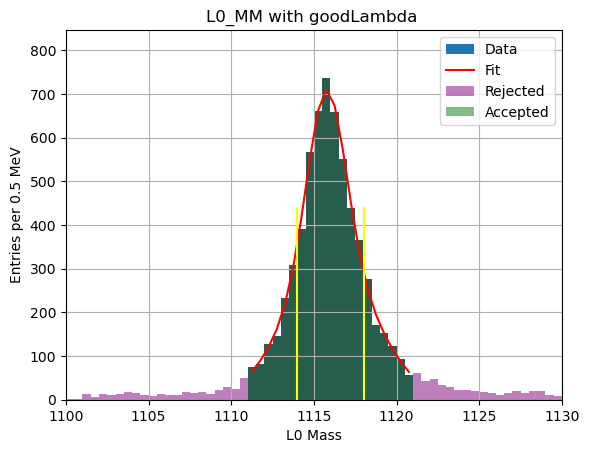

In [154]:
fig, ax = fit_model_L.plot(fit_result_L, binsL, nCL, title='L0_MM with goodLambda ', xlabel='L0 Mass', ylabel='Entries per 0.5 MeV', vlines=[1114., 1118.], show_plot=False)
ax.hist(L0_MM[temp_cut], bins=60, range=(1100, 1130), color='purple', alpha=0.5, label='Rejected')
ax.hist(L0_MM[good_Lambda], bins=60, range=(1100, 1130), color='g', alpha=0.5, label='Accepted')
plt.legend()

plt.show()

### Lambda LL (L0_LL)

### Fit using Double Gaussian plus Explonential

Now lets do the random search / also use things in a better and (hacky) way. 

The fit is for L0 with the following cuts 

`good_LambdaLL`   = `(Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & LL`


In [22]:
root_name = "_LL"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaLL], bins=60, range=(1100,1130))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (1110, 1116),
    "mu2": (1110, 1116),
    "sigma1": (10, 20),
    "sigma2": (10, 20),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 664.2114808383219
Best initial parameters: {'n_s': 1566.2866188540188, 'f': 0.8384243668736202, 'n_b': 20.530586189220283, 'mu1': 1110.6641791580132, 'mu2': 1110.514162533274, 'sigma1': 16.552335726226357, 'sigma2': 13.224707177091602, 'A': 0.049296544221572924, 'b': 0.9453156304406591}
2302.6364642841672, 0.6647051674740584, -1824.199020429571, 1119.272693245285, 1115.7507087570102, 6.9026348985106925, 1.170111960186182, -6808.839299318084, -0.0955246384718778>


We can use these values as a good initial guess list 

In [23]:
root_name = "_LL"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "init_pars": None,
    "minuit_limits": None,
    "fit_model": None,
    "fit_result": None,
    "fig": None,
    "ax": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaLL], bins=60, range=(1100,1130))
plt.close()

# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
variables["init_pars" + root_name] = [1828.0599366650097, 0.4941768942938372, -22732.448819532376, 1115.813484591921, 1115.968219607668, 0.9105384655460779, 2.194006264575918, -0.04194529869310294, 1.5782139821288466] ## good_LambdaLL

variables["minuit_limits" + root_name] = {
    "f": (0.0001, 0.9999),
}

variables["fit_model" + root_name] = DoubleGaussian_plus_Exp(variables["bins" + root_name], variables["nC" + root_name], variables["minuit_limits" + root_name])

variables["fit_result" + root_name] = variables["fit_model" + root_name].fit(variables["init_pars" + root_name])

# Print the fitted parameters
print("Fitted parameters:", variables["fit_result" + root_name].values)
variables["fit_result" + root_name]



Fitted parameters: <ValueView n_s=1034.1647357846027 f=0.65957633933352 n_b=-22732.45116034853 mu1=1115.7526609869326 mu2=1115.904218224469 sigma1=1.1037649568352879 sigma2=2.7614085299540334 A=-0.04194529869306367 b=-1.1448258842150598>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.25                       │              Nfcn = 367              │
│ EDM = 0.000174 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │  1.034e3  │  0.034e3  │            │            │         │         │       │
│ 1 │ f      │   0.66    │   0.10    │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │-22.7325e3 │ 0.0014e3  │            │            │         │         │       │
│ 3 │ mu1    │ 1.11575e3 │ 0.00006e3 │            │            │         │         │       │
│ 4 │ mu2    │ 1.11590e3 │ 0.00022e3 │            │            │         │         │       │
│ 5 │ sigma1 │    1.1    │    0.1    │            │            │         │         │       │
│ 6 │ sigma2 │    2.8    │    0.5    │            │            │         │         │       │
│ 7 │ A      │   -0.0    │    1.4    │            │            │         │         │       │
│ 8 │ b      │   -1.14   │   0.35    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬──────────────────────────────────────────────────────────────────────────────────┐
│        │      n_s        f      n_b      mu1      mu2   sigma1   sigma2        A        b │
├────────┼──────────────────────────────────────────────────────────────────────────────────┤
│    n_s │ 1.18e+03    0.744     -0.0    0.207    -0.45    0.665     4.97      0.0    -2.17 │
│      f │    0.744  0.00967    -0.00    0.002   -0.004    0.009    0.045     0.00   -0.033 │
│    n_b │     -0.0    -0.00        2   -0.000     0.00   -0.000    -0.00       -0     0.00 │
│    mu1 │    0.207    0.002   -0.000  0.00401   -0.007    0.002    0.010    0.000   -0.007 │
│    mu2 │    -0.45   -0.004     0.00   -0.007   0.0468   -0.003    -0.03    -0.00     0.02 │
│ sigma1 │    0.665    0.009   -0.000    0.002   -0.003   0.0111    0.041    0.000   -0.032 │
│ sigma2 │     4.97    0.045    -0.00    0.010    -0.03    0.041    0.261     0.00    -0.17 │
│      A │      0.0     0.00       -0    0.000    -0.00    0.000     0.00        2    -0.00 │
│      b │    -2.17   -0.033     0.00   -0.007     0.02   -0.032    -0.17    -0.00    0.121 │
└────────┴──────────────────────────────────────────────────────────────────────────────────┘

again, lets plot the histogram and fit superimposed on the hitsogram for lambda with same cuts but without the mass cut.

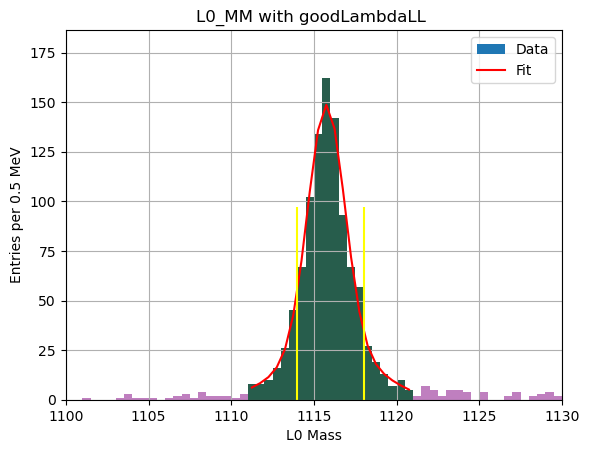

In [24]:
variables["fig" + root_name], variables["ax" + root_name] = variables["fit_model" + root_name].plot(variables["fit_result" + root_name], variables["bins" + root_name], variables["nC" + root_name], title='L0_MM with goodLambdaLL ', xlabel='L0 Mass', ylabel='Entries per 0.5 MeV', vlines=[1114., 1118.], show_plot=False)

variables["ax" + root_name].hist(L0_MM[temp_cutLL], bins=60, range=(1100, 1130), color='purple', alpha=0.5)
variables["ax" + root_name].hist(L0_MM[good_LambdaLL], bins=60, range=(1100, 1130), color='g', alpha=0.5)

plt.show()


## Lambda DD (L0_DD)

### Fit using Double Gaussian plus Exponential

lets again, start with some random search to acquire good initial guess

The fit is for L0 with the following cuts 

`good_LambdaDD`   = `(Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & DD`


In [25]:
root_name = "_DD"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaDD], bins=60, range=(1100,1130))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (1110, 1116),
    "mu2": (1110, 1116),
    "sigma1": (10, 20),
    "sigma2": (10, 20),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 2014.9897778858153
Best initial parameters: {'n_s': 9085.70052327326, 'f': 0.7364876728625847, 'n_b': 47.51559404079485, 'mu1': 1112.627304015858, 'mu2': 1115.5141065057144, 'sigma1': 10.933565499023757, 'sigma2': 12.586099692789507, 'A': -0.014468933221281954, 'b': -0.1770572709223075}
11530.113639208412, 0.7731328641851349, -11820.78757517635, 1118.010449306956, 1115.74902653119, 5.22429577167008, 1.3581152738354267, 50338.65404437066, -0.1113011723172451>


Now we use this initial guess to do the fit 

In [26]:
root_name = "_DD"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "init_pars": None,
    "minuit_limits": None,
    "fit_model": None,
    "fit_result": None,
    "fig": None,
    "ax": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaDD], bins=60, range=(1100,1130))
plt.close()

# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
variables["init_pars" + root_name] = [9120.817313121128, 0.929509388491892, 6548.478148791116, 1115.7823039513255, 1499.4428273473834, 1.6580107105881836, 4.957241526156779, -0.030793060590727006, -0.050084638862231065] ## good_LambdaLL

variables["minuit_limits" + root_name] = {
    "f": (0.0001, 0.9999),
}

variables["fit_model" + root_name] = DoubleGaussian_plus_Exp(variables["bins" + root_name], variables["nC" + root_name], variables["minuit_limits" + root_name])

variables["fit_result" + root_name] = variables["fit_model" + root_name].fit(variables["init_pars" + root_name])

# Print the fitted parameters
print("Fitted parameters:", variables["fit_result" + root_name].values)
variables["fit_result" + root_name]



Fitted parameters: <ValueView n_s=7545.3806909725745 f=0.5338891139097182 n_b=3431.6673953163054 mu1=1115.869620426922 mu2=1499.4428273473834 sigma1=1.6764477526703891 sigma2=-14.856448310640877 A=-0.042164952544651225 b=-0.00854861184985901>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 30.05                      │              Nfcn = 719              │
│ EDM = 3.47e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │  7.55e3   │  0.12e3   │            │            │         │         │       │
│ 1 │ f      │   0.534   │   0.013   │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │  3.43e3   │  0.35e3   │            │            │         │         │       │
│ 3 │ mu1    │ 1.11587e3 │ 0.00004e3 │            │            │         │         │       │
│ 4 │ mu2    │ 1.4994e3  │ 0.0014e3  │            │            │         │         │       │
│ 5 │ sigma1 │   1.68    │   0.05    │            │            │         │         │       │
│ 6 │ sigma2 │  -0.01e3  │  0.23e3   │            │            │         │         │       │
│ 7 │ A      │   -0.0    │    1.4    │            │            │         │         │       │
│ 8 │ b      │  -0.009   │   0.016   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────────────────────────────────────────────────────────────────────────────┐
│        │        n_s          f        n_b        mu1        mu2     sigma1     sigma2          A          b │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    n_s │   1.41e+04  513.76e-3   -0.025e6    -0.1696        0.0     3.0364         -0        0.0 -260.63e-3 │
│      f │  513.76e-3   0.000161   -3.32010   -0.01e-3          0    0.42e-3   -3.37e-3          0   -0.03e-3 │
│    n_b │   -0.025e6   -3.32010   1.25e+05     1.0988        0.0   -13.9258          0       -0.0    1.53413 │
│    mu1 │    -0.1696   -0.01e-3     1.0988    0.00162     0.0000    -0.0000    -0.0074     0.0000    0.37e-3 │
│    mu2 │        0.0          0        0.0     0.0000          2     0.0000        0.0          0          0 │
│ sigma1 │     3.0364    0.42e-3   -13.9258    -0.0000     0.0000    0.00244    -0.0100     0.0000   -0.13e-3 │
│ sigma2 │         -0   -3.37e-3          0    -0.0074        0.0    -0.0100   5.38e+04       -0.0   -4.09e-3 │
│      A │        0.0          0       -0.0     0.0000          0     0.0000       -0.0          2          0 │
│      b │ -260.63e-3   -0.03e-3    1.53413    0.37e-3          0   -0.13e-3   -4.09e-3          0   0.000264 │
└────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

and we do the same plots as before:

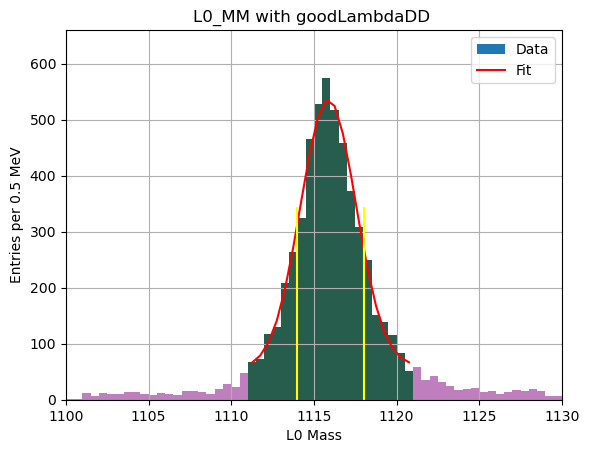

In [27]:
variables["fig" + root_name], variables["ax" + root_name] = variables["fit_model" + root_name].plot(variables["fit_result" + root_name], variables["bins" + root_name], variables["nC" + root_name], title='L0_MM with goodLambdaDD ', xlabel='L0 Mass', ylabel='Entries per 0.5 MeV', vlines=[1114., 1118.], show_plot=False)

variables["ax" + root_name].hist(L0_MM[temp_cutDD], bins=60, range=(1100, 1130), color='purple', alpha=0.5)
variables["ax" + root_name].hist(L0_MM[good_LambdaDD], bins=60, range=(1100, 1130), color='g', alpha=0.5)

plt.show()


# B Fitting

First lets try to get a good B+ sample. we will try the following cuts

- p_ProbNNp
- good_Lambda
- prodProbKK > 0.2
- B_region

In [28]:

good_b = good_Lambda & (prodProbKK > 0.4) & (p_ProbNNp > 0.5)  & B_region
good_cand = good_Lambda & (prodProbKK > 0.4) & (p_ProbNNp > 0.5)
better_b = good_b & (Bu_IPCHI2_OWNPV < 5)
# add mass cut that Bu_MM is between 5200 and 5400
good_b_mass = Bu_MM[good_b]


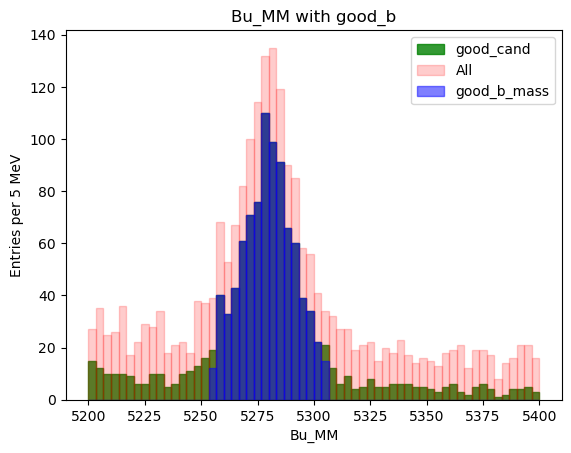

In [29]:
# Now lets plot the Bu_Mass for good_b

plt.figure()
plt.hist(Bu_MM[good_cand], bins=60, range=(5200, 5400), facecolor='g', edgecolor='g', alpha=0.8, label='good_cand')
plt.hist(Bu_MM, bins=60, range=(5200, 5400), facecolor='r', edgecolor='r', alpha=0.2, label='All')
plt.hist(good_b_mass, bins=60, range=(5200, 5400), facecolor='b', edgecolor='b', alpha=0.5, label='good_b_mass')
plt.xlabel('Bu_MM')
plt.ylabel('Entries per 5 MeV')
plt.title('Bu_MM with good_b')
plt.legend()
plt.show()


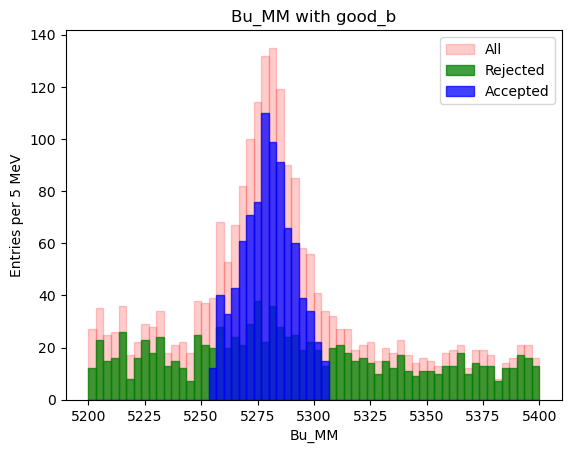

In [30]:
# Now lets plot the Bu_Mass for good_b

rejected = np.logical_not(good_cand)
plt.figure()
plt.hist(Bu_MM, bins=60, range=(5200, 5400), facecolor='r', edgecolor='r', alpha=0.2, label='All')
plt.hist(Bu_MM[rejected], bins=60, range=(5200, 5400), facecolor='g', edgecolor='g', alpha=0.75, label='Rejected')
plt.hist(Bu_MM[good_b], bins=60, range=(5200, 5400), facecolor='b', edgecolor='b', alpha=0.75, label='Accepted')
plt.xlabel('Bu_MM')
plt.ylabel('Entries per 5 MeV')
plt.title('Bu_MM with good_b')
plt.legend()
plt.show()


Now lets try to fit this plot. lets first try doublegaussian plus expoentnial

In [31]:
root_name = "_B"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "init_pars": None,
    "minuit_limits": None,
    "fit_model": None,
    "fit_result": None,
    "fig": None,
    "ax": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(good_b_mass, bins=40, range=(5240,5320))
plt.close()

# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
variables["init_pars" + root_name] = [9000, 0.3050696413197713, 0.06, 5249.469752417054, 5297.090841788354, 43.980247470343194, 40.79790976237721, 0.03215102477516779, 0.662131351551057
                                    ] ## good_LambdaLL

variables["minuit_limits" + root_name] = {
    "f": (0.0001, 0.9999),
}

variables["fit_model" + root_name] = DoubleGaussian_plus_Exp(variables["bins" + root_name], variables["nC" + root_name], variables["minuit_limits" + root_name])

variables["fit_result" + root_name] = variables["fit_model" + root_name].fit(variables["init_pars" + root_name])

# Print the fitted parameters
print("Fitted parameters:", variables["fit_result" + root_name].values)
variables["fit_result" + root_name]



Fitted parameters: <ValueView n_s=177772.95199384468 f=0.07210772940673575 n_b=-24186.743876424727 mu1=5000.463754578035 mu2=5893.672347480994 sigma1=-143.060418163935 sigma2=220.8622086388042 A=0.03215102477516779 b=-2.8974940291873907>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 259.1                      │             Nfcn = 1136              │
│ EDM = 1.35e+13 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│           Hesse FAILED           │       Covariance NOT pos. def.       │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │ 1.7777e5  │ 0.0000e5  │            │            │         │         │       │
│ 1 │ f      │ 7.2108e-2 │ 0.0000e-2 │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │ -2.4187e4 │ 0.0000e4  │            │            │         │         │       │
│ 3 │ mu1    │ 5.0005e3  │ 0.0000e3  │            │            │         │         │       │
│ 4 │ mu2    │ 5.8937e3  │ 0.0000e3  │            │            │         │         │       │
│ 5 │ sigma1 │ -1.4306e2 │ 0.0000e2  │            │            │         │         │       │
│ 6 │ sigma2 │ 2.2086e2  │ 0.0000e2  │            │            │         │         │       │
│ 7 │ A      │ 3.2151e-2 │ 0.0000e-2 │            │            │         │         │       │
│ 8 │ b      │  -2.8975  │  0.0000   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

Now lets plot the fit.

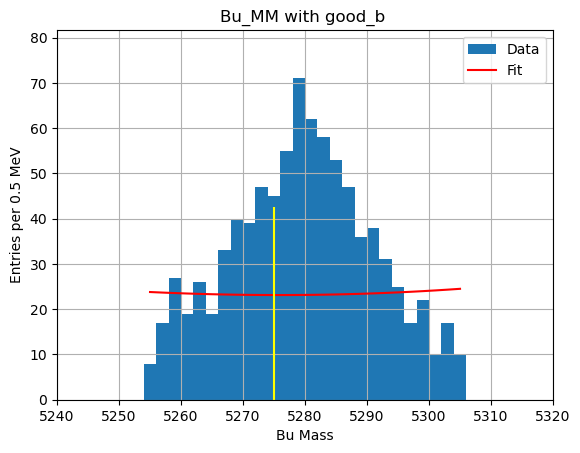

In [32]:
root_name = "_B"

variables["fig" + root_name], variables["ax" + root_name] = variables["fit_model" + root_name].plot(variables["fit_result" + root_name], variables["bins" + root_name], variables["nC" + root_name], title='Bu_MM with good_b ', xlabel='Bu Mass', ylabel='Entries per 0.5 MeV', vlines=[5275. , 5385.], show_plot=False)
plt.show()


It seems that I need some random search 

In [33]:
root_name = "_B"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(good_b_mass, bins=60, range=(1100,1130))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (5240,5320),
    "mu2": (5240,5320),
    "sigma1": (40, 50),
    "sigma2": (50, 40),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 0.0
Best initial parameters: {'n_s': 6058.103965296585, 'f': 0.5840543591259055, 'n_b': 81.24723955232197, 'mu1': 5312.415332841091, 'mu2': 5268.580512832751, 'sigma1': 47.93919336908064, 'sigma2': 46.05023832647246, 'A': -0.02836652713525778, 'b': 0.6615078154905849}
6058.103965296585, 0.5840543591259055, 81.24723955232197, 5312.415332841091, 5268.580512832751, 47.93919336908064, 46.05023832647246, -0.02836652713525778, 0.6615078154905849>


## Invariant Masses

First, lets define the four momentums for our decay produces. we have different combinantions. the following table put a summary for that

| Combination        | Possible Resonance       
| ------------- |:-------------:| 
| K₁⁺ K₂⁺     |None
| Λ₋p      | Nucleon Resonances     
| Λ₋K₁⁺ | Hyperon Resonances     
| Λ₋K₂⁺ | Hyperon Resonances      
| pK₁⁺ | Hyperon Resonances     
| pK₂⁺ | Hyperon Resonances      
| Λ₋pK₁⁺ | Baryon Resonances      
| Λ₋pK₂⁺ | Baryon Resonances      
| pK₁⁺K₂⁺ | Baryon Resonances      
| Λ₋K₁⁺K₂⁺ | Baryon Resonances

In [34]:
K1_4vec  = vector.awk({"x":h1_PX, "y":h1_PY, "z":h1_PZ, "t":h1_PE}) # K+
K2_4vec  = vector.awk({"x":h2_PX, "y":h2_PY, "z":h2_PZ, "t":h2_PE}) # K+
p_4vec   = vector.awk({"x":p_PX,  "y":p_PY,  "z":p_PZ,  "t":p_PE}) # p
L0_4vec  = vector.awk({"x":L0_PX,  "y":L0_PY,  "z":L0_PZ,  "t":L0_PE}) # L0

KK_4vec  = K1_4vec+K2_4vec
pKK_4vec = p_4vec+KK_4vec 

LbarpKp_4vec = L0_4vec + p_4vec + K2_4vec

KK_mass  = np.sqrt(np.square(KK_4vec.t)  - np.square(KK_4vec.x)  - np.square(KK_4vec.y)  - np.square(KK_4vec.z))

pKK_mass = np.sqrt(np.square(pKK_4vec.t) - np.square(pKK_4vec.x) - np.square(pKK_4vec.y) - np.square(pKK_4vec.z))

LbarpKp_mass = np.sqrt(np.square(LbarpKp_4vec.t) - np.square(LbarpKp_4vec.x) - np.square(LbarpKp_4vec.y) - np.square(LbarpKp_4vec.z))

In [35]:
print(K1_4vec)
print(K2_4vec)

[{x: 1.18e+03, y: 2.17e+03, z: 3.38e+04, t: 3.39e+04}, ..., {x: -1.09e+03, ...}]
[{x: 1.97e+03, y: 538, z: 2.6e+04, t: 2.61e+04}, ..., {x: -952, y: ..., ...}]


### Vector meson resonances

#### K+K+

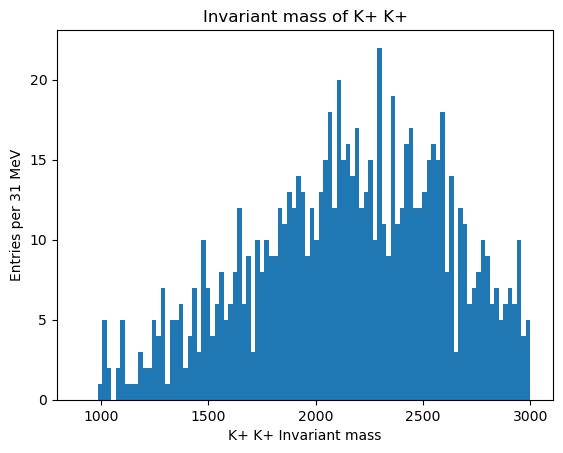

In [36]:
# plt the K+ K+ invaarint mass histogram
plt.figure()
plt.hist(KK_mass[good_b], bins=100, range=(900, 3000))
plt.title("Invariant mass of K+ K+")
plt.xlabel("K+ K+ Invariant mass")
plt.ylabel("Entries per 31 MeV")
plt.show()

### Hyperon resonances

#### $\Lambda_{\bar{\phantom{x}}}$ K+

In [37]:
# define a four momentum for L0 K+ system (First K+)
L0Kp_4vec = L0_4vec + K1_4vec
    
L0Kp1_M = np.sqrt(np.square(L0Kp_4vec.t) - np.square(L0Kp_4vec.x) - np.square(L0Kp_4vec.y) - np.square(L0Kp_4vec.z))    

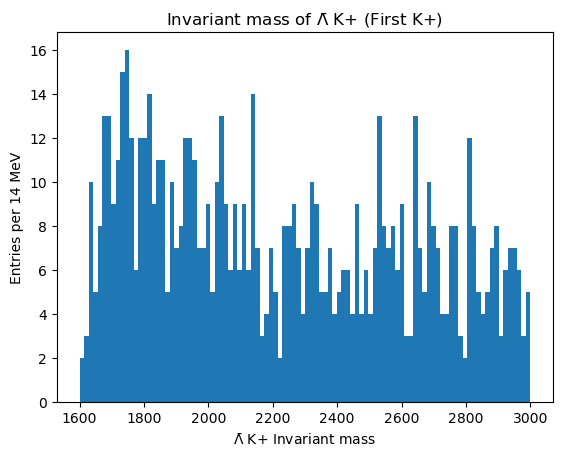

In [38]:
# plt the L0 K+ invaarint mass histogram
plt.figure()
plt.hist(L0Kp1_M[good_b], bins=100, range=(1600, 3000))
plt.title(r"Invariant mass of $\Lambda$̄ K+ (First K+)")
plt.xlabel(r"$\Lambda$̄ K+ Invariant mass")
plt.ylabel("Entries per 14 MeV")
plt.show()



In [39]:
# define a four momentum for L0 K+ system (First K+)
L0Kp_4vec = L0_4vec + K2_4vec
    
L0Kp2_M = np.sqrt(np.square(L0Kp_4vec.t) - np.square(L0Kp_4vec.x) - np.square(L0Kp_4vec.y) - np.square(L0Kp_4vec.z))    

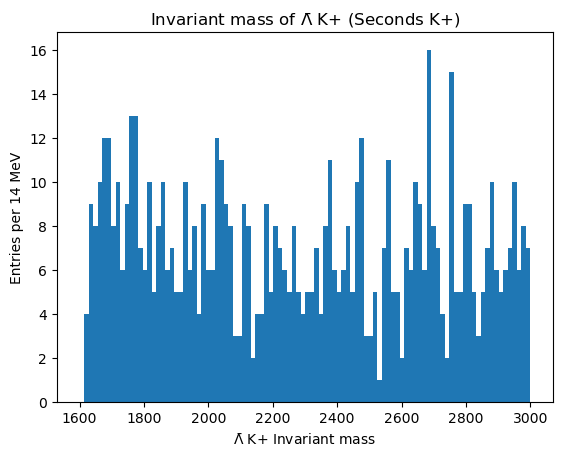

In [40]:
# plt the L0 K+ invaarint mass histogram
plt.figure()
plt.hist(L0Kp2_M[good_b], bins=100, range=(1600, 3000))
plt.title(r"Invariant mass of $\Lambda$̄ K+ (Seconds K+)")
plt.xlabel(r"$\Lambda$̄ K+ Invariant mass")
plt.ylabel("Entries per 14 MeV")
plt.show()



### Excited Nucleons

#### $\Lambda_{\bar{\phantom{x}}}$ p

Now, we study the excited nucleons from $\Lambda_{\bar{\phantom{x}}}$ p

In [41]:
# define a four momentum for L0 p system 
Lbarp_4vec = L0_4vec + p_4vec

Lbarp_mass = np.sqrt(np.square(Lbarp_4vec.t) - np.square(Lbarp_4vec.x) - np.square(Lbarp_4vec.y) - np.square(Lbarp_4vec.z))


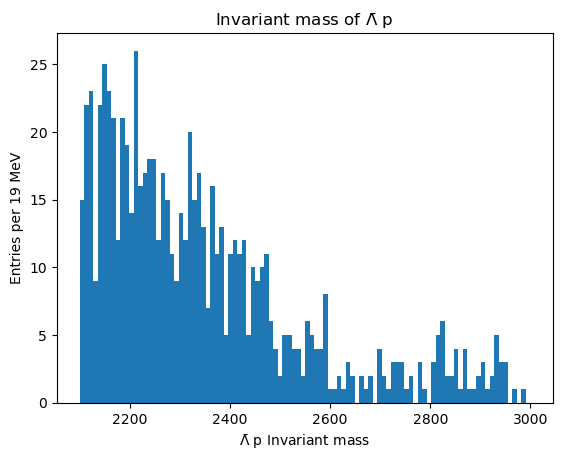

In [42]:
# plt the L0 K+ invaarint mass histogram
plt.figure()
plt.hist(Lbarp_mass[good_b], bins=100, range=(2100, 3000))
plt.title(r"Invariant mass of $\Lambda$̄ p ")
plt.xlabel(r"$\Lambda$̄ p Invariant mass")
plt.ylabel("Entries per 19 MeV")
plt.show()



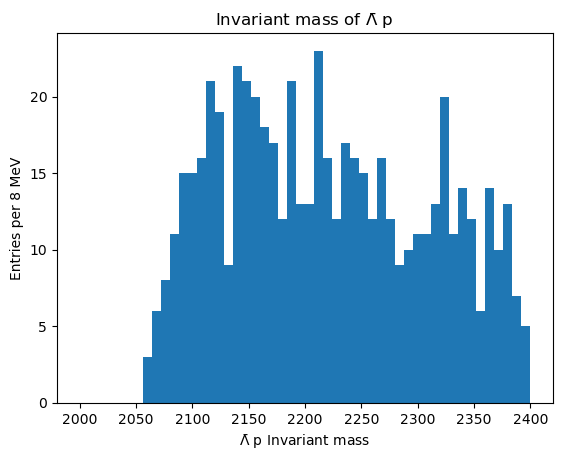

In [43]:
# plt the L0 p invaarint mass histogram
plt.figure()
plt.hist(Lbarp_mass[good_b], bins=50, range=(2000, 2400))
plt.title(r"Invariant mass of $\Lambda$̄ p ")
plt.xlabel(r"$\Lambda$̄ p Invariant mass")
plt.ylabel("Entries per 8 MeV")
plt.show()



### p K+

In [44]:
# define a four momentum for p K+ system (First K+)

pKp1_4vec = p_4vec + K1_4vec
pKp1_mass = np.sqrt(np.square(pKp1_4vec.t) - np.square(pKp1_4vec.x) - np.square(pKp1_4vec.y) - np.square(pKp1_4vec.z))


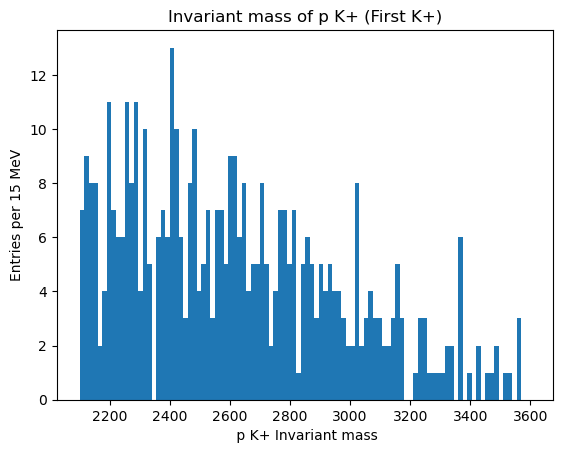

In [45]:
# plt the p K+ invaarint mass histogram (First K+)

plt.figure()
plt.hist(pKp1_mass[good_b], bins=100, range=(2100, 3600))
plt.title(r"Invariant mass of p K+ (First K+)")
plt.xlabel(r" p K+ Invariant mass")
plt.ylabel("Entries per 15 MeV")
plt.show()



In [46]:
# define a four momentum for p K+ system (Seconds K+)
pKp2_4vec = p_4vec + K2_4vec
pKp2_mass = np.sqrt(np.square(pKp2_4vec.t) - np.square(pKp2_4vec.x) - np.square(pKp2_4vec.y) - np.square(pKp2_4vec.z))

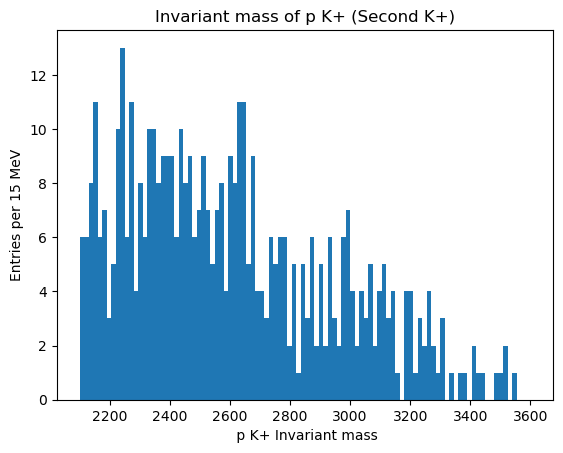

In [47]:
# plt the p K+ invaarint mass histogram (Second K+)

plt.figure()
plt.hist(pKp2_mass[good_b], bins=100, range=(2100, 3600))
plt.title(r"Invariant mass of p K+ (Second K+)")
plt.xlabel(r" p K+ Invariant mass")
plt.ylabel("Entries per 15 MeV")
plt.show()



### Λ p K⁺

In [48]:
# Now lets add the Λ₋pK₁⁺ system and define a four momentum for it (First K+)
LbarpKp1_4vec = L0_4vec + p_4vec + K1_4vec
LbarpKp1_mass = np.sqrt(np.square(LbarpKp1_4vec.t) - np.square(LbarpKp1_4vec.x) - np.square(LbarpKp1_4vec.y) - np.square(LbarpKp1_4vec.z))



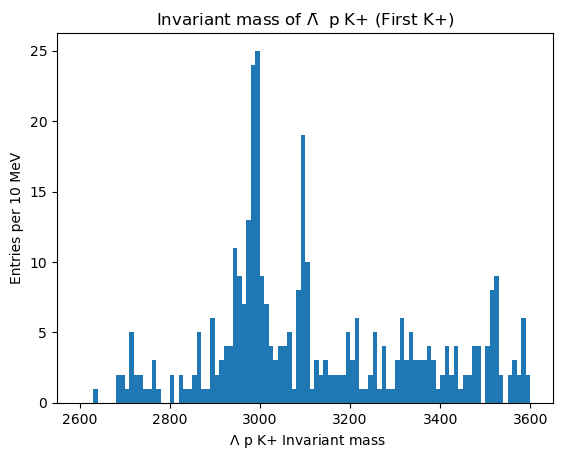

In [49]:
plt.figure()
plt.hist(LbarpKp1_mass[good_b], bins=100, range=(2600, 3600))
plt.title(r"Invariant mass of $\Lambda$̄  p K+ (First K+)")
plt.xlabel(r" $\Lambda$ p K+ Invariant mass")
plt.ylabel("Entries per 10 MeV")
plt.show()


In [50]:
# Now lets add the Λ₋pK₁⁺ system and define a four momentum for it (Second K+)
LbarpKp2_4vec = L0_4vec + p_4vec + K2_4vec
LbarpKp2_mass = np.sqrt(np.square(LbarpKp2_4vec.t) - np.square(LbarpKp2_4vec.x) - np.square(LbarpKp2_4vec.y) - np.square(LbarpKp2_4vec.z))

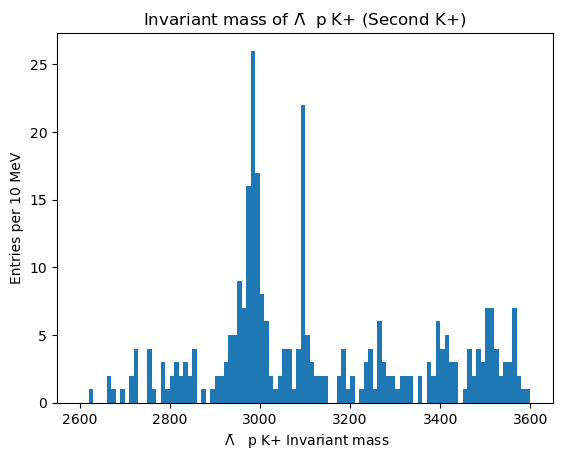

In [51]:
plt.figure()
plt.hist(LbarpKp2_mass[good_b], bins=100, range=(2600, 3600))
plt.title(r"Invariant mass of $\Lambda$̄  p K+ (Second K+)")
plt.xlabel(r" $\Lambda$̄   p K+ Invariant mass")
plt.ylabel("Entries per 10 MeV")
plt.show()


#### Λ K⁺ K⁺

In [52]:
# Lets define the four vector for the Λ K+ K+ system 
L0KpKp_4vec = L0_4vec + K1_4vec + K2_4vec
L0KpKp_mass = np.sqrt(np.square(L0KpKp_4vec.t) - np.square(L0KpKp_4vec.x) - np.square(L0KpKp_4vec.y) - np.square(L0KpKp_4vec.z))

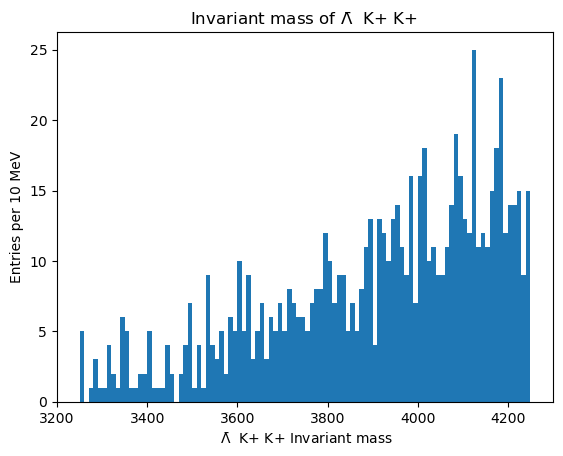

In [53]:
plt.figure()
plt.hist(L0KpKp_mass[good_b], bins=100, range=(3250, 4250))
plt.title(r"Invariant mass of $\Lambda$̄  K+ K+ ")
plt.xlabel(r" $\Lambda$̄  K+ K+ Invariant mass")
plt.ylabel("Entries per 10 MeV")
plt.show()


#### p K⁺ K⁺

In [54]:
# Lets define the four vector for the  p K+ K+ system
pKpKp_4vec = p_4vec + K1_4vec + K2_4vec
pKpKp_mass = np.sqrt(np.square(pKpKp_4vec.t) - np.square(pKpKp_4vec.x) - np.square(pKpKp_4vec.y) - np.square(pKpKp_4vec.z))

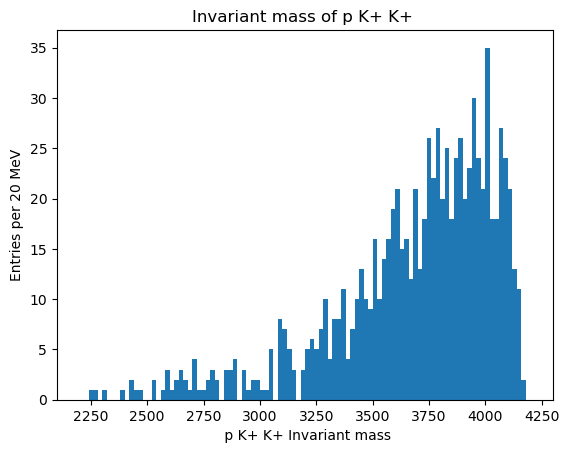

In [55]:
plt.figure()
plt.hist(pKpKp_mass[good_b], bins=100, range=(2200, 4200))
plt.title(r"Invariant mass of p K+ K+ ")
plt.xlabel(r" p K+ K+ Invariant mass")
plt.ylabel("Entries per 20 MeV")
plt.show()


## plots for talks

### RD

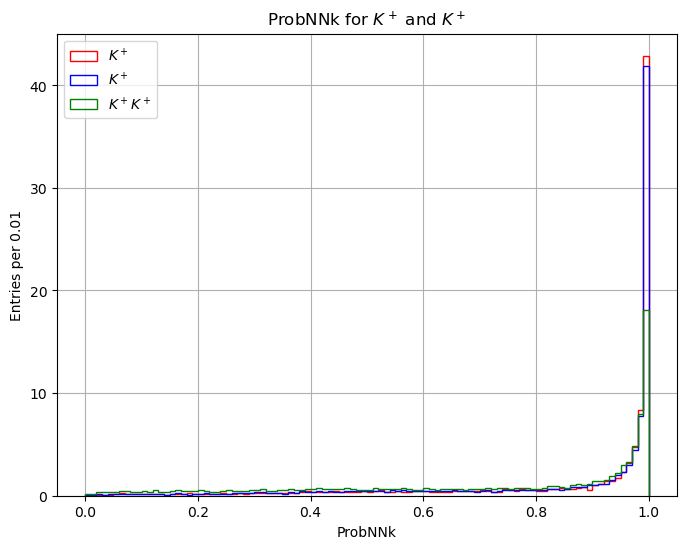

In [146]:
# plot the probNNK distribution for Kp and Km
plt.figure(figsize=(8,6))
plt.hist(h1_probNNk, bins=100, range=(0,1), histtype='step', label=r'$K^+$', density=True, color='red')
plt.hist(h2_probNNk, bins=100, range=(0,1), histtype='step', label=r'$K^+$', density=True, color='blue')
plt.hist(prodProbKK, bins=100, range=(0,1), histtype='step', label=r'$K^+K^+$', density=True, color='green')
plt.xlabel('ProbNNk')
plt.ylabel('Entries per 0.01')
plt.title(r'ProbNNk for $K^+$ and $K^+$')
plt.legend()
plt.grid(True)
plt.show()

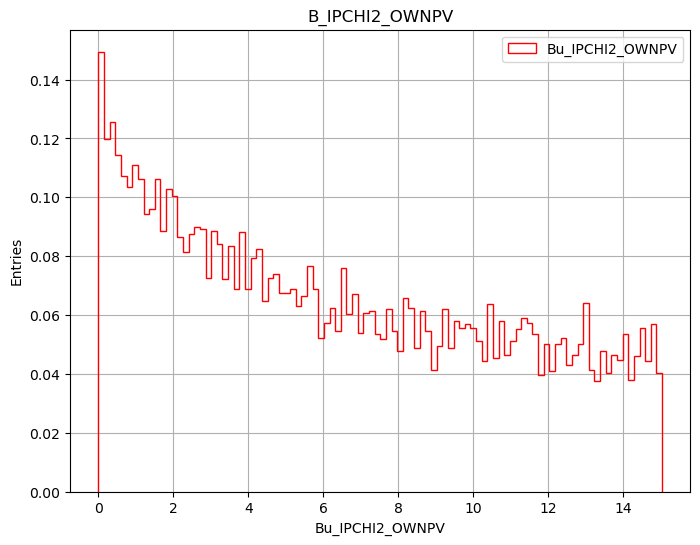

In [153]:
# plot the Bu_IPCHI2_OWNPV distribution
plt.figure(figsize=(8,6))
plt.hist(Bu_IPCHI2_OWNPV, bins=100, histtype='step', label=r'Bu_IPCHI2_OWNPV', density=True, color='red')
plt.xlabel('Bu_IPCHI2_OWNPV')
plt.ylabel('Entries')
plt.title(r'B_IPCHI2_OWNPV')
plt.legend()
plt.grid(True)
plt.show()

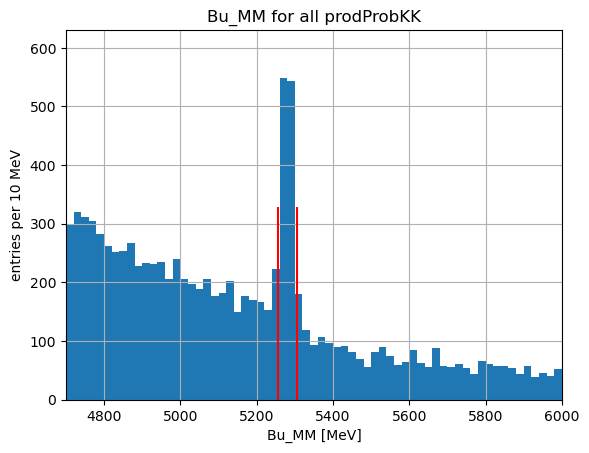

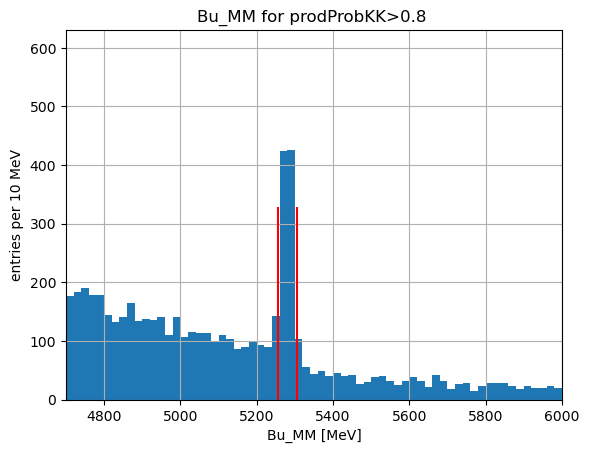

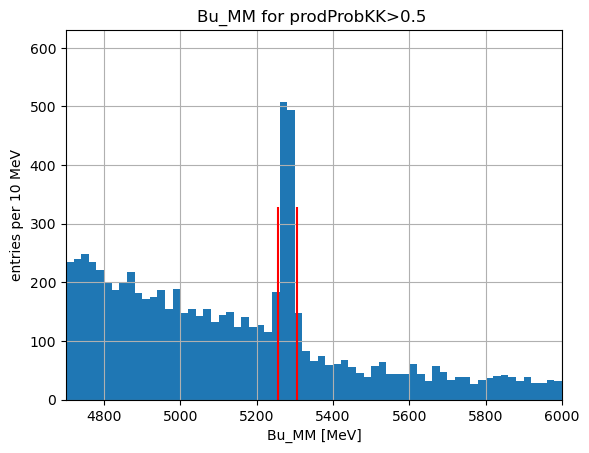

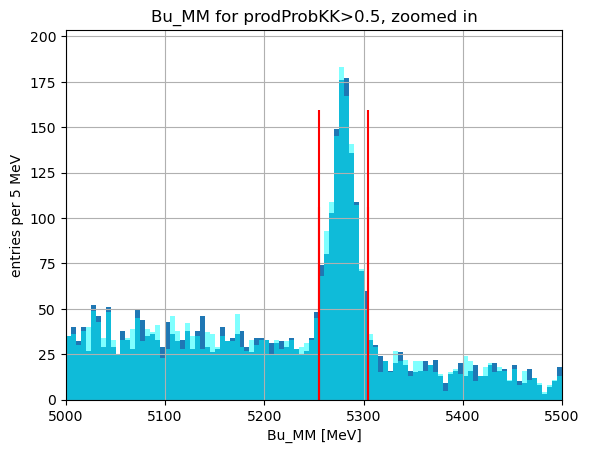

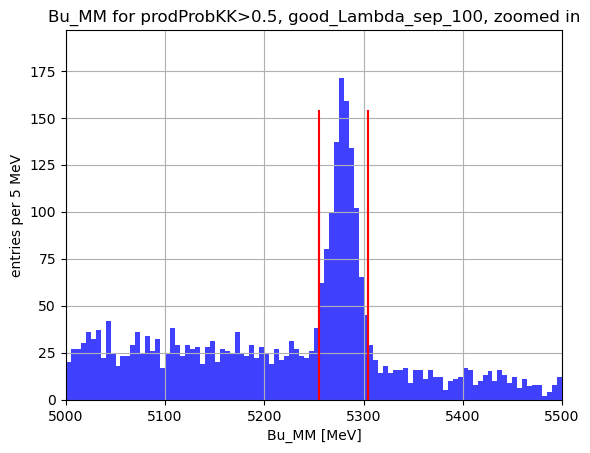

In [58]:
prodProb_0p8 = prodProbKK>0.8
prodProb_0p5 = prodProbKK>0.5



plt.figure()
plt.title('Bu_MM for all prodProbKK')
nC, bins, patches = plt.hist(Bu_MM, bins=100, range=(4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')
plt.show()



plt.figure()
plt.title('Bu_MM for prodProbKK>0.8 ')
plt.hist(Bu_MM[prodProb_0p8], bins=100, range=(4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')


plt.figure()
plt.title('Bu_MM for prodProbKK>0.5 ')
plt.hist(Bu_MM[prodProb_0p5], bins=100, range=(4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')
plt.show()


Lambda_corrected_mass = Bu_MM - L0_MM + 1115.5

plt.figure()
plt.title('Bu_MM for prodProbKK>0.5, zoomed in')
nC, bins, patches = plt.hist(Bu_MM[prodProb_0p5], bins=100, range=(5000,5500))
plt.hist(Lambda_corrected_mass[prodProb_0p5], bins=100, range=(5000,5500), color='cyan', alpha = 0.50)
plt.vlines(5305, 0., 0.90*max(nC), colors='r')
plt.vlines(5255, 0., 0.90*max(nC), colors='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')

####

plt.figure()
plt.title('Bu_MM for prodProbKK>0.5, good_Lambda_sep_100, zoomed in')
nC, bins, patches = plt.hist(Lambda_corrected_mass[prodProb_0p5 & good_Lambda_sep_100], bins=100, range=(5000,5500), color='b', alpha = 0.75)
plt.vlines(5305, 0., 0.90*max(nC), colors='r')
plt.vlines(5255, 0., 0.90*max(nC), colors='r')
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([5000,5500.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')
plt.show()





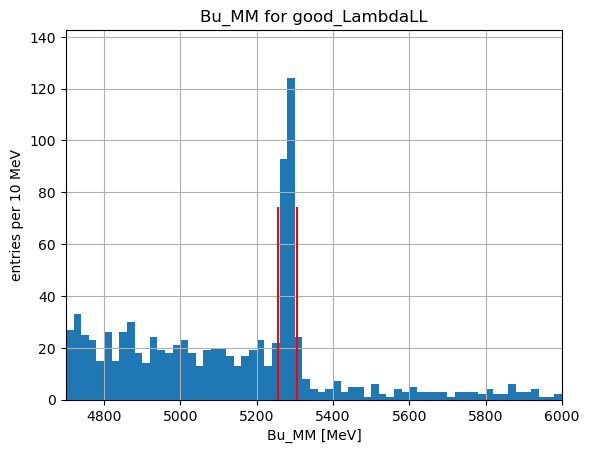

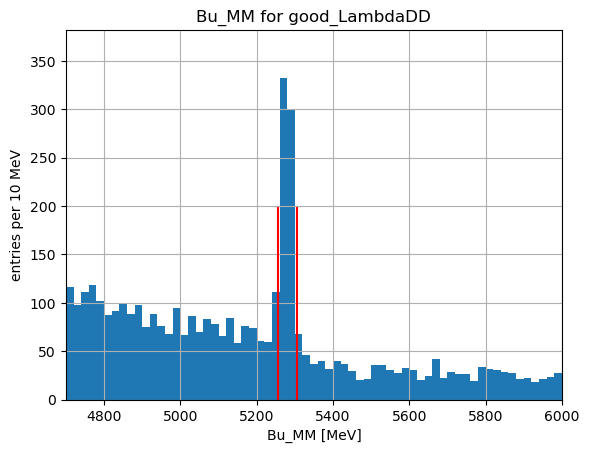

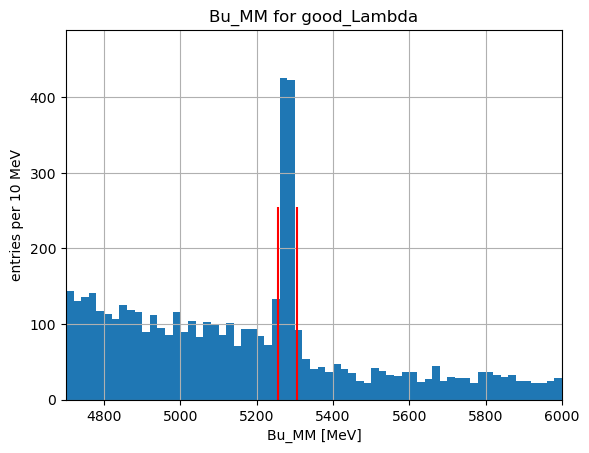

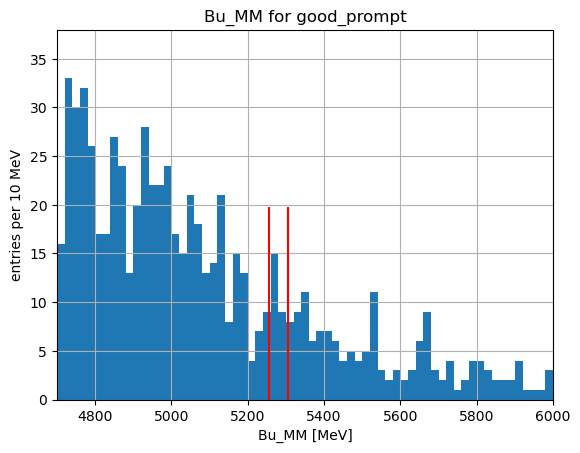

In [60]:
plt.figure()
plt.title('Bu_MM for good_LambdaLL')
nC, bins, patches = plt.hist(Bu_MM[good_LambdaLL], bins=100, range=(4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')
plt.show()

plt.figure()
plt.title('Bu_MM for good_LambdaDD')
nC, bins, patches = plt.hist(Bu_MM[good_LambdaDD], bins=100, range=(4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')
plt.show()


plt.figure()
plt.title('Bu_MM for good_Lambda')
nC, bins, patches = plt.hist(Bu_MM[good_Lambda], bins=100, range=(4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')
plt.show()

plt.figure()
plt.title('Bu_MM for good_prompt')
nC, bins, patches = plt.hist(Bu_MM[good_prompt], bins=100, range=(4500,6500))
plt.xlabel(r'Bu_MM [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.6*max(nC), colors='red')
plt.vlines(5305., 0., 0.6*max(nC), colors='red')
plt.show()



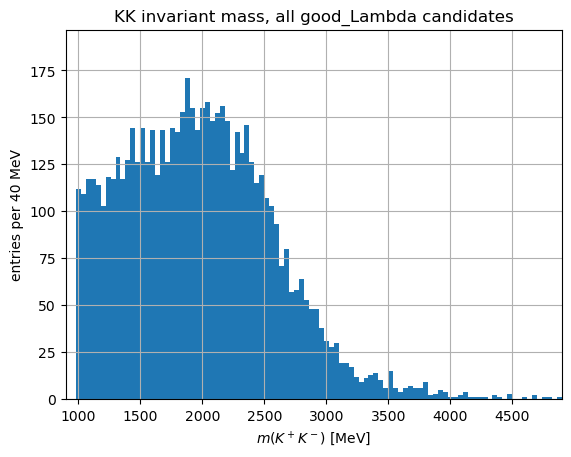

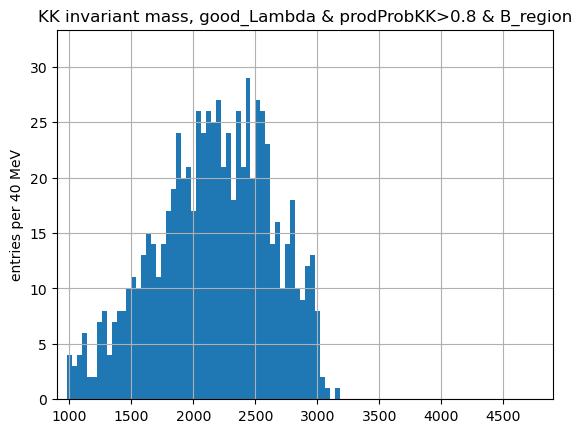

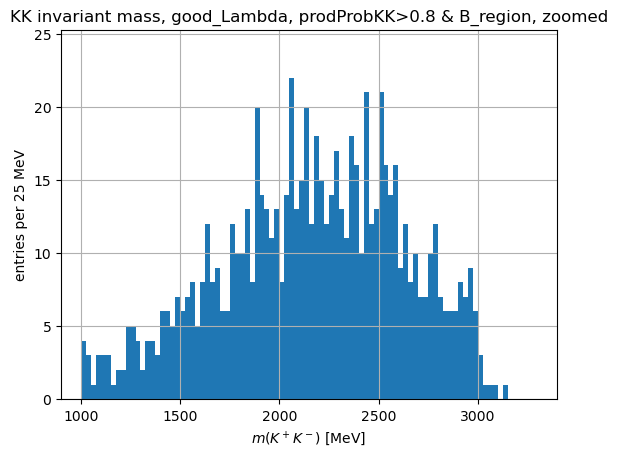

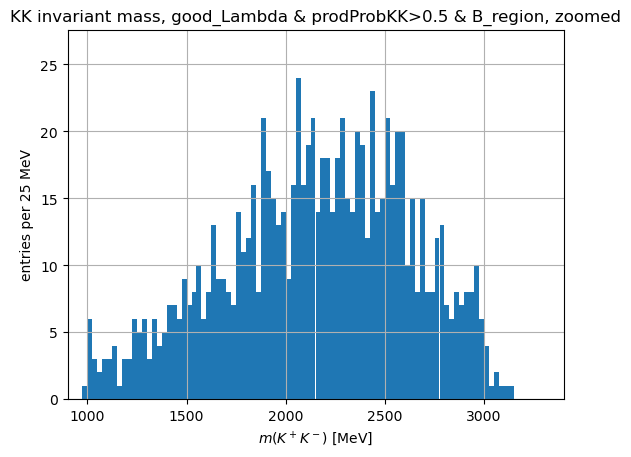

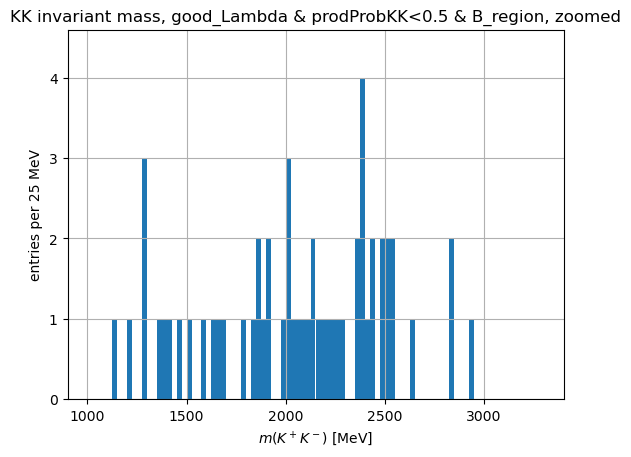

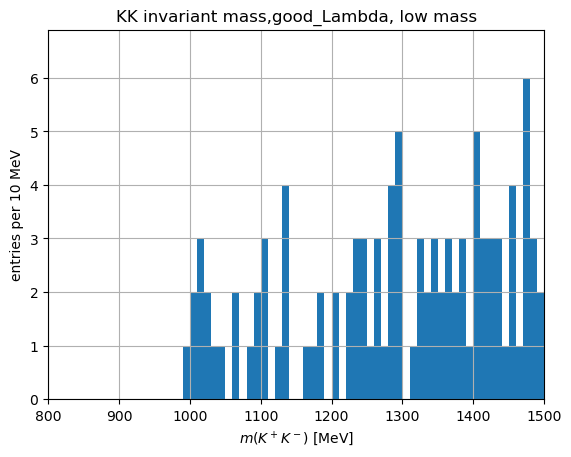

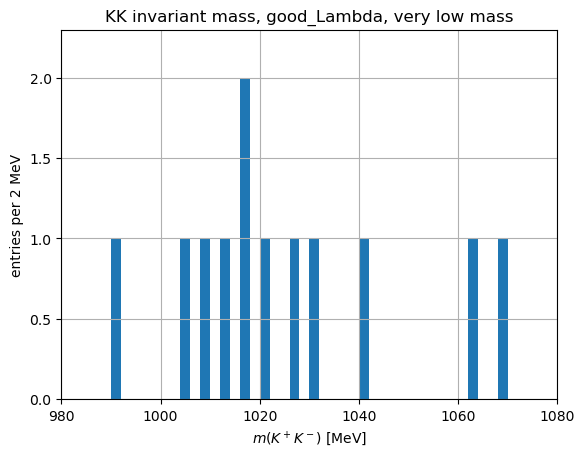

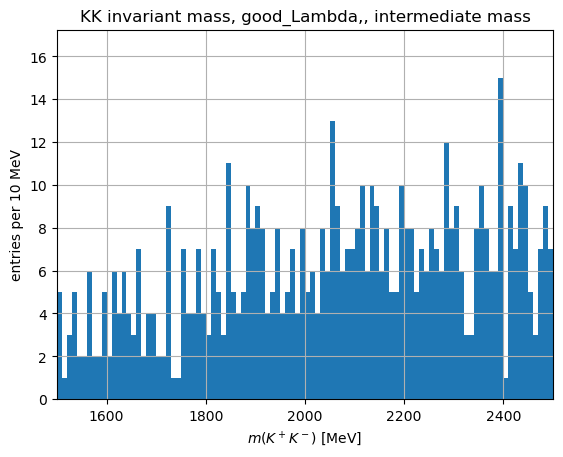

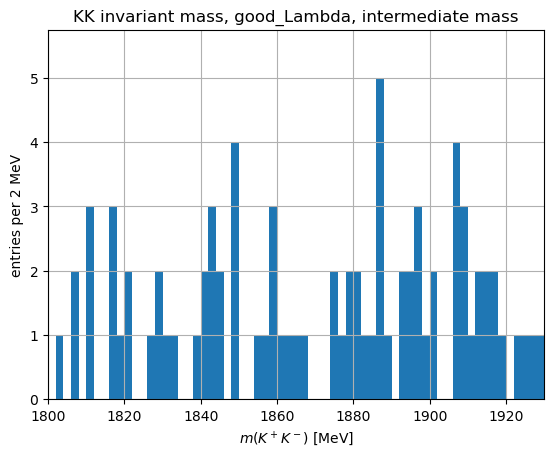

In [61]:
plt.figure()
plt.title('KK invariant mass, all good_Lambda candidates')
nC, bin, patches = plt.hist(KK_mass[good_Lambda], bins=100, range=(900.,4900.))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 40 MeV')
plt.axis([900.,4900.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

plt.figure()
plt.title('KK invariant mass, good_Lambda & prodProbKK>0.8 & B_region')
nC, bin, patches = plt.hist(KK_mass[good_Lambda & (prodProbKK>0.8) & B_region], bins=100, range=(900.,4900.))
plt.ylabel('entries per 40 MeV')
plt.axis([900.,4900.,0,1.15*max(nC)])
plt.grid(True)
plt.show()


plt.figure()
plt.title('KK invariant mass, good_Lambda, prodProbKK>0.8 & B_region, zoomed')
nC, bin, patches = plt.hist(KK_mass[good_Lambda & (prodProbKK>0.8) & B_region], bins=100, range=(900,3400))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 25 MeV')
plt.axis([900,3400,0,1.15*max(nC)])
plt.grid(True)
plt.show()


plt.figure()
plt.title('KK invariant mass, good_Lambda & prodProbKK>0.5 & B_region, zoomed')
nC, bin, patches =plt.hist(KK_mass[good_Lambda & (prodProbKK>0.5) & B_region & good_Lambda_sep_100], bins=100, range=(900,3400))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 25 MeV')
plt.axis([900,3400,0,1.15*max(nC)])
plt.grid(True)
plt.show()

plt.figure()
plt.title('KK invariant mass, good_Lambda & prodProbKK<0.5 & B_region, zoomed')
nC, bin, patches =plt.hist(KK_mass[good_Lambda & (prodProbKK<0.5) & B_region], bins=100, range=(900,3400))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 25 MeV')
plt.axis([900,3400,0,1.15*max(nC)])
plt.grid(True)
plt.show()



plt.title('KK invariant mass,good_Lambda, low mass')
nC, bin, patches = plt.hist(KK_mass[good_Lambda & (KK_mass<1500) & B_region], bins=70, range=(800,1500))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([800,1500,0,1.15*max(nC)])
plt.grid(True)
plt.show()

plt.title('KK invariant mass, good_Lambda, very low mass')
nC, bin, patches = plt.hist(KK_mass[good_Lambda & (KK_mass<1100) & B_region], bins=50, range=(980,1080))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 2 MeV')
plt.axis([980,1080,0,1.15*max(nC)])
plt.grid(True)
plt.show()

plt.title('KK invariant mass, good_Lambda,, intermediate mass')
nC, bin, patches = plt.hist(KK_mass[good_Lambda & (KK_mass>1500) & (KK_mass<2500) & B_region], bins=100, range=(1500,2500))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([1500,2500,0,1.15*max(nC)])
plt.grid(True)
plt.show()


plt.title('KK invariant mass, good_Lambda, intermediate mass')
nC, bin, patches = plt.hist(KK_mass[good_Lambda & (KK_mass>1800) & (KK_mass<1930) & B_region], bins=65, range=(1800,1930))
plt.xlabel(r'$ m(K^+ K^-) $ [MeV]')
plt.ylabel('entries per 2 MeV')
plt.axis([1800,1930,0,1.15*max(nC)])
plt.grid(True)
plt.show()


In [62]:
D_region = (KK_mass > 1850) & (KK_mass < 1880)
phi_region = (KK_mass > 1010) & (KK_mass < 1030)


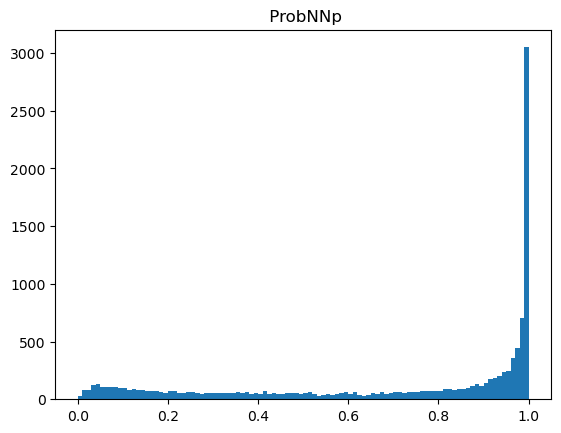

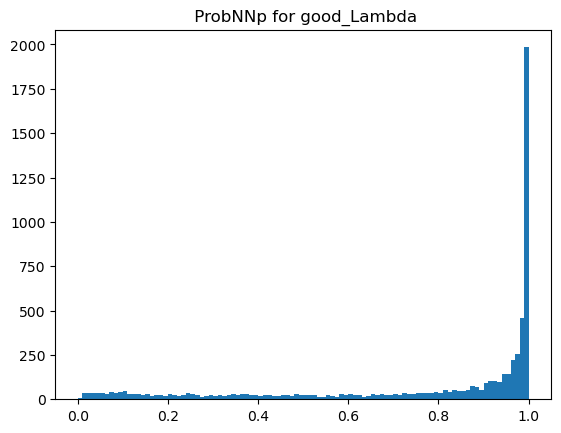

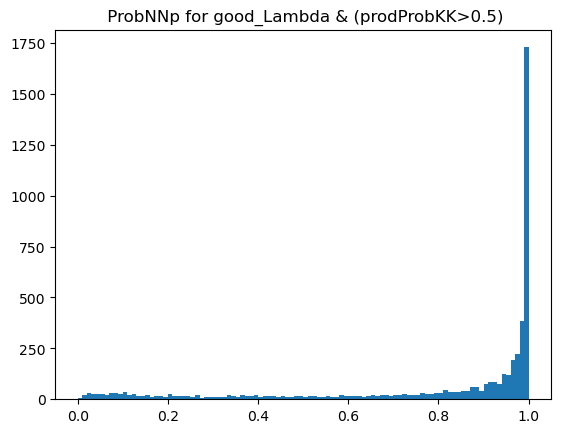

In [142]:
plt.figure()
plt.title(' ProbNNp')
plt.hist(p_ProbNNp, bins=100, range=(0.,1.))
plt.show()


plt.figure()
plt.title(' ProbNNp for good_Lambda')
plt.hist(p_ProbNNp[good_Lambda], bins=100, range=(0.,1.))
plt.show()

plt.figure()
plt.title(' ProbNNp for good_Lambda & (prodProbKK>0.5)')
plt.hist(p_ProbNNp[good_Lambda & (prodProbKK>0.5)], bins=100, range=(0.,1.))
plt.show()

In [65]:
good_pProbNNp = (p_ProbNNp>0.5)
bad_pProbNNp  = (p_ProbNNp<0.5)


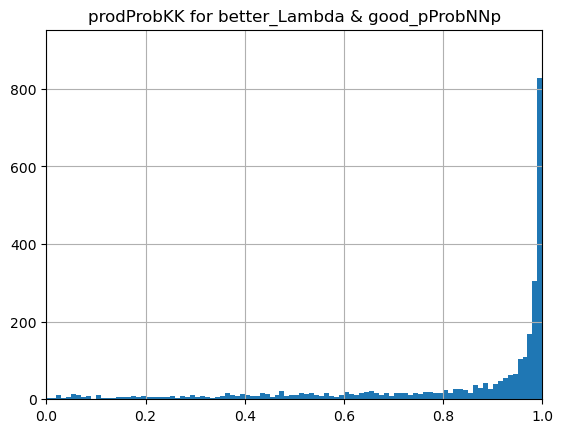

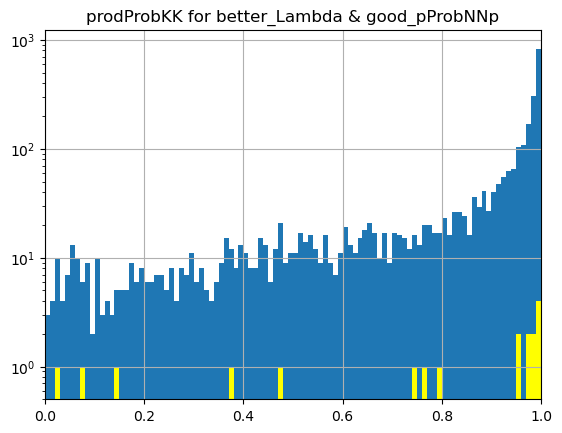

In [66]:
plt.figure()
plt.title('prodProbKK for better_Lambda & good_pProbNNp')
nC, bins, patches = plt.hist(prodProbKK[better_Lambda & good_pProbNNp], bins=100, range=(0.,1.))
plt.axis([0.,1.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

plt.figure()
plt.title('prodProbKK for better_Lambda & good_pProbNNp')
nC, bins, patches = plt.hist(prodProbKK[better_Lambda & good_pProbNNp], bins=100, range=(0.,1.))
nC_goodPhi, bins, patches = plt.hist(prodProbKK[better_Lambda & good_pProbNNp & phi_region], bins=100, range=(0.,1.), color='yellow')
plt.axis([0.,1.,0.5,1.5*max(nC)])
plt.yscale('log')
plt.grid(True)
plt.show()

In [70]:
B_region = (Bu_MM>5255.) & (Bu_MM<5305.)
prodProb_ppbar = np.multiply(p_ProbNNp,Lp_ProbNNp)
good_candLL     = good_LambdaLL & (prodProbKK>0.5) & (prodProb_ppbar>0.2)
good_candDD     = good_LambdaDD & (prodProbKK>0.5) & (prodProb_ppbar>0.2)
good_cand       = good_Lambda   & (prodProbKK>0.5) & (prodProb_ppbar>0.2)

better_cand   = good_cand & (Bu_IPCHI2_OWNPV<6) 
better_candLL = good_candLL & (Bu_IPCHI2_OWNPV<6)
better_candDD = good_candDD & (Bu_IPCHI2_OWNPV<6)

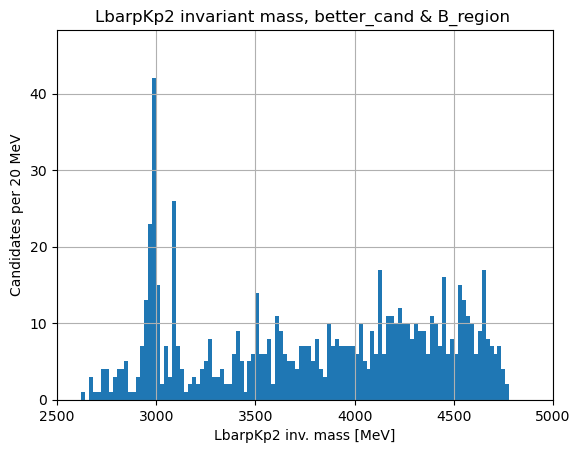

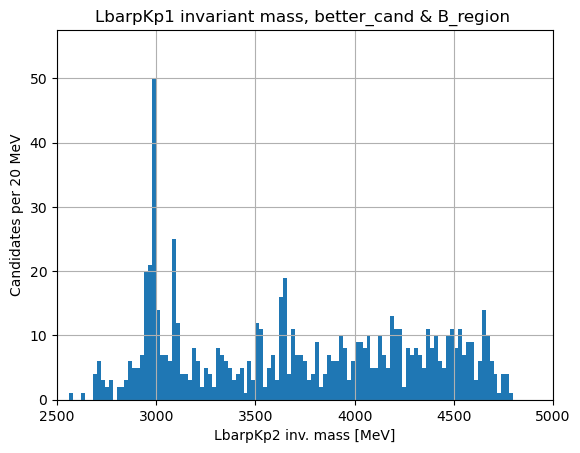

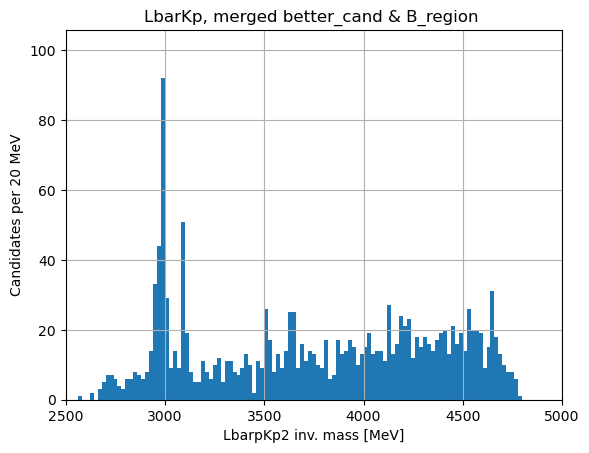

In [71]:
plt.figure()
plt.title('LbarpKp2 invariant mass, better_cand & B_region ')
nC, bins, patches = plt.hist(LbarpKp2_mass[better_cand & B_region], bins=125, range=(2500,5000))
plt.xlabel(r'LbarpKp2 inv. mass [MeV]')
plt.ylabel('Candidates per 20 MeV')
plt.axis([2500,5000,0,1.15*max(nC)])
plt.grid(True)
plt.show()


plt.figure()
plt.title('LbarpKp1 invariant mass, better_cand & B_region ')
nC, bins, patches = plt.hist(LbarpKp1_mass[better_cand & B_region], bins=125, range=(2500,5000))
plt.xlabel(r'LbarpKp2 inv. mass [MeV]')
plt.ylabel('Candidates per 20 MeV')
plt.axis([2500,5000,0,1.15*max(nC)])
plt.grid(True)
plt.show()

LbarpKp2_mass_goodB = np.asarray(LbarpKp2_mass[better_cand & B_region])
LbarpKp1_mass_goodB = np.asarray(LbarpKp1_mass[better_cand & B_region])
LbarKp_mass_goodB   = np.concatenate([LbarpKp2_mass_goodB,LbarpKp1_mass_goodB])


plt.figure()
plt.title('LbarKp, merged better_cand & B_region ')
nC, bins, patches = plt.hist(LbarKp_mass_goodB, bins=125, range=(2500,5000))
plt.xlabel(r'LbarpKp2 inv. mass [MeV]')
plt.ylabel('Candidates per 20 MeV')
plt.axis([2500,5000,0,1.15*max(nC)])
plt.grid(True)
plt.show()


In [72]:
notD_or_phi = ((KK_mass<1850) | (KK_mass>1880)) & (KK_mass>1030)

In [73]:
good_prodProbKK = (prodProbKK>0.5)
good_probNNx = good_pProbNNp & good_prodProbKK

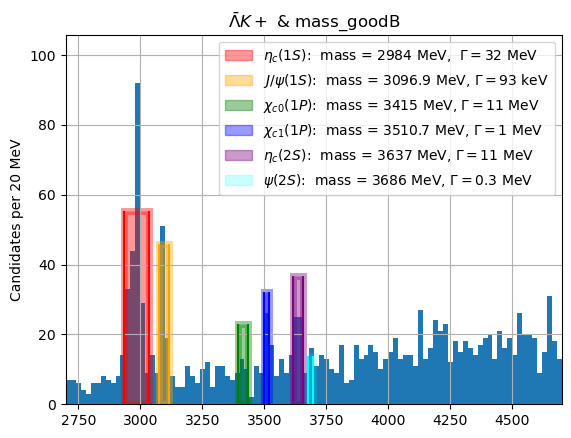

In [136]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

plt.figure()
plt.title(r'$\bar{\Lambda} K+$ & mass_goodB')
nC, bins, patches = plt.hist(LbarKp_mass_goodB, bins=110, range=(2600,4800))
plt.ylabel('Candidates per 20 MeV')
plt.axis([2700.,4700.,0,1.15*max(nC)])
plt.grid(True)

colors = ['red', 'orange', 'green', 'blue', 'purple', 'cyan']

plt.vlines(2934., 0., 0.6*max(nC), colors=colors[0])
plt.vlines(3034., 0., 0.6*max(nC), colors=colors[0])
plt.gca().add_patch(Rectangle((2934, 0), 100, 0.6*max(nC), edgecolor = colors[0], facecolor = colors[0], fill=True, lw=5, alpha=0.40))

plt.vlines(3077, 0., 0.5*max(nC), colors=colors[1])
plt.vlines(3117, 0., 0.5*max(nC), colors=colors[1])
plt.gca().add_patch(Rectangle((3077, 0), 40, 0.5*max(nC), edgecolor = colors[1], facecolor = colors[1], fill=True, lw=5, alpha=0.40))

plt.vlines(3395., 0., 0.25*max(nC), colors=colors[2])
plt.vlines(3435., 0., 0.25*max(nC), colors=colors[2])
plt.gca().add_patch(Rectangle((3395., 0), 40, 0.25*max(nC), edgecolor = colors[2], facecolor = colors[2], fill=True, lw=5, alpha=0.40))

plt.vlines(3500.7, 0., 0.35*max(nC), colors=colors[3])
plt.vlines(3520.7, 0., 0.35*max(nC), colors=colors[3])
plt.gca().add_patch(Rectangle((3500.7, 0), 20, 0.35*max(nC), edgecolor = colors[3], facecolor = colors[3], fill=True, lw=5, alpha=0.40))

plt.vlines(3617, 0., 0.40*max(nC), colors=colors[4])
plt.vlines(3657, 0., 0.40*max(nC), colors=colors[4])
plt.gca().add_patch(Rectangle((3617, 0), 40, 0.40*max(nC), edgecolor = colors[4], facecolor = colors[4], fill=True, lw=5, alpha=0.40))

plt.vlines(3676, 0., 0.15*max(nC), colors=colors[5])
plt.vlines(3696, 0., 0.15*max(nC), colors=colors[5])
plt.gca().add_patch(Rectangle((3676, 0), 20, 0.15*max(nC), edgecolor = colors[5], facecolor = colors[5], fill=True, lw=5, alpha=0.20))

patches_legend = [mpatches.Patch(color=color, alpha=0.40 if i != 5 else 0.20, label=label) for i, (color, label) in enumerate(zip(colors, [
    r'$ \eta_c (1S) $:  mass = 2984 MeV,  $ \Gamma = 32 $ MeV',
    r'$ J/\psi (1S) $:  mass = 3096.9 MeV, $ \Gamma = 93 $ keV',
    r'$ \chi_{c0} (1P) $:  mass = 3415 MeV, $ \Gamma = 11 $ MeV',
    r'$ \chi_{c1} (1P) $:  mass = 3510.7 MeV, $ \Gamma = 1 $ MeV',
    r'$ \eta_c (2S) $:  mass = 3637 MeV, $ \Gamma = 11 $ MeV',
    r'$ \psi(2S) $:  mass = 3686 MeV, $ \Gamma = 0.3 $ MeV']))]

plt.legend(handles=patches_legend, loc='upper right')

plt.show()


In [76]:
etaC1S_range = ((LbarpKp1_mass>2934.) & (LbarpKp1_mass<3034.)) | ((LbarpKp2_mass>2934.) & (LbarpKp2_mass<3034.))
etaC1S       = better_cand & etaC1S_range

Jpsi_range = ((LbarpKp1_mass>3077.) & (LbarpKp1_mass<3127.)) | ((LbarpKp2_mass>3077.) & (LbarpKp2_mass<3127.))
Jpsi       = better_cand & Jpsi_range

chiC01P_range = ((LbarpKp1_mass>3395.) & (LbarpKp1_mass<3435.)) | ((LbarpKp2_mass>3395.) & (LbarpKp2_mass<3435.))
chiC01P       = better_cand & chiC01P_range

chiC11P_range = ((LbarpKp1_mass>3500.7) & (LbarpKp1_mass<3520.7)) | ((LbarpKp2_mass>3500.7) & (LbarpKp2_mass<3520.7))
chiC11P       = better_cand & chiC01P_range

etaC2S_range = ((LbarpKp1_mass>3617.) & (LbarpKp1_mass<3657.)) | ((LbarpKp2_mass>3617.) & (LbarpKp2_mass<3657.))
etaC2S       = better_cand & chiC01P_range

charmonium  = etaC1S  | Jpsi | chiC01P | chiC11P | etaC2S 

not_charmonium = np.logical_and(better_cand,np.logical_not(charmonium))

In [78]:
pKm_4vec = p_4vec + K2_4vec
pKm_mass = np.sqrt(np.square(pKm_4vec.t) - np.square(pKm_4vec.x) - np.square(pKm_4vec.y) - np.square(pKm_4vec.z))

pKp_4vec = p_4vec + K1_4vec
pKp_mass = np.sqrt(np.square(pKp_4vec.t) - np.square(pKp_4vec.x) - np.square(pKp_4vec.y) - np.square(pKp_4vec.z))

Lbarp_4vec = L0_4vec + p_4vec
Lbarp_mass = np.sqrt(np.square(Lbarp_4vec.t) - np.square(Lbarp_4vec.x) - np.square(Lbarp_4vec.y) - np.square(Lbarp_4vec.z))

LbarKm_4vec = L0_4vec + K1_4vec
LbarKm_mass = np.sqrt(np.square(LbarKm_4vec.t) - np.square(LbarKm_4vec.x) - np.square(LbarKm_4vec.y) - np.square(LbarKm_4vec.z))

LbarKp_4vec = L0_4vec + K2_4vec
LbarKp_mass = np.sqrt(np.square(LbarKp_4vec.t) - np.square(LbarKp_4vec.x) - np.square(LbarKp_4vec.y) - np.square(LbarKp_4vec.z))

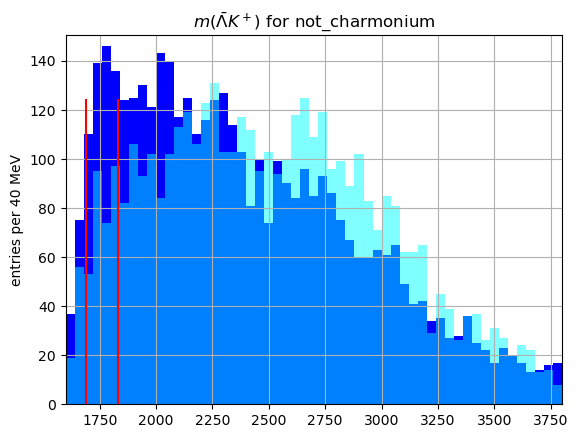

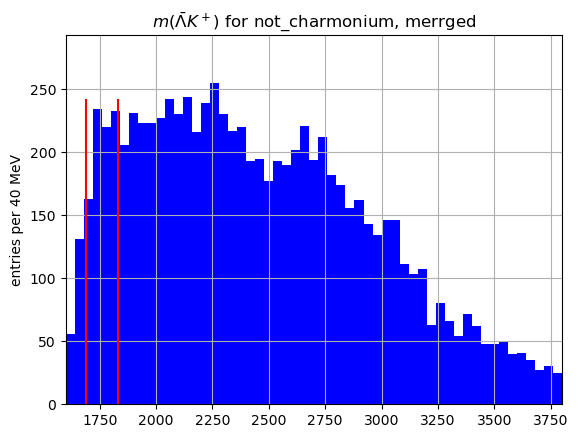

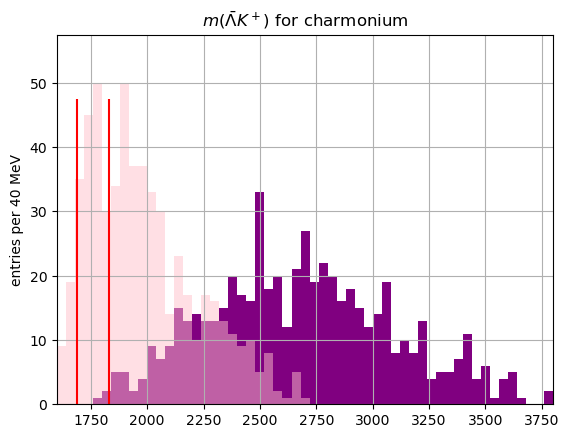

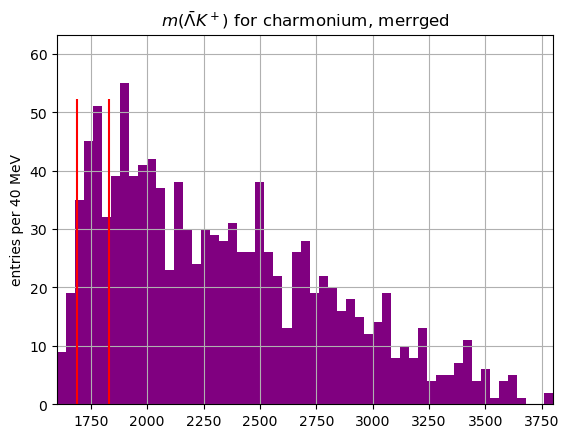

In [140]:
plt.figure()
plt.title(r'$ m(\bar{\Lambda} K^+ ) $ for not_charmonium')
nC, bins, patches = plt.hist(LbarKm_mass[not_charmonium], bins=55, range=(1600,3800), color='b')
nC, bins, patches = plt.hist(LbarKp_mass[not_charmonium], bins=55, range=(1600,3800), color='cyan', alpha=0.50)
plt.vlines(1690, 0., 0.95*max(nC), colors='r')
plt.vlines(1830, 0., 0.95*max(nC), colors='r')
plt.ylabel('entries per 40 MeV')
plt.axis([1600,3800,0,1.15*max(nC)])
plt.grid(True)
plt.show()

LKp1__not_charmonium = LbarKm_mass[not_charmonium]
LKp2__not_charmonium = LbarKp_mass[not_charmonium]
LKp_not_charmonium = np.concatenate([LKp1__not_charmonium,LKp2__not_charmonium])
plt.figure()
plt.title(r'$ m(\bar{\Lambda} K^+ ) $ for not_charmonium, merrged')
nC, bins, patches = plt.hist(LKp_not_charmonium , bins=55, range=(1600,3800), color='b')
plt.vlines(1690, 0., 0.95*max(nC), colors='r')
plt.vlines(1830, 0., 0.95*max(nC), colors='r')
plt.ylabel('entries per 40 MeV')
plt.axis([1600,3800,0,1.15*max(nC)])
plt.grid(True)
plt.show()


plt.figure()
plt.title(r'$ m(\bar{\Lambda} K^+ ) $ for charmonium')
nC, bins, patches = plt.hist(LbarKm_mass[charmonium], bins=55, range=(1600,3800), color='purple')
nC, bins, patches = plt.hist(LbarKp_mass[charmonium], bins=55, range=(1600,3800), color='pink', alpha=0.50)
plt.vlines(1690, 0., 0.95*max(nC), colors='r')
plt.vlines(1830, 0., 0.95*max(nC), colors='r')
plt.ylabel('entries per 40 MeV')
plt.axis([1600,3800,0,1.15*max(nC)])
plt.grid(True)

plt.show()

LKp1__charmonium = LbarKm_mass[charmonium]
LKp2__charmonium = LbarKp_mass[charmonium]
LKp_charmonium = np.concatenate([LKp1__charmonium,LKp2__charmonium])
plt.figure()
plt.title(r'$ m(\bar{\Lambda} K^+ ) $ for charmonium, merrged')
nC, bins, patches = plt.hist(LKp_charmonium , bins=55, range=(1600,3800), color='purple')
plt.vlines(1690, 0., 0.95*max(nC), colors='r')
plt.vlines(1830, 0., 0.95*max(nC), colors='r')
plt.ylabel('entries per 40 MeV')
plt.axis([1600,3800,0,1.15*max(nC)])
plt.grid(True)
plt.show()


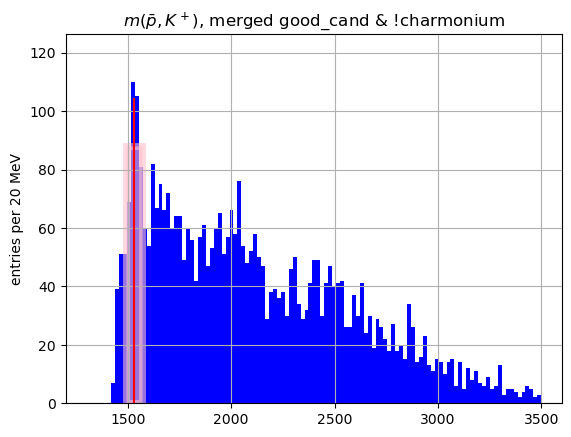

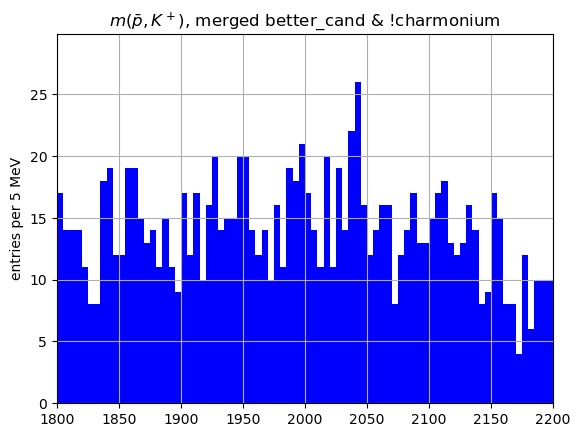

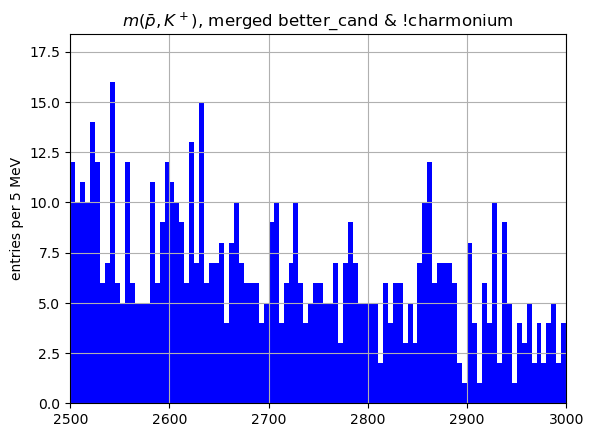

In [80]:



pbarKp2_mass_not_charmonium = pKm_mass[not_charmonium]
pbarKp1_mass_not_charmonium = pKp_mass[not_charmonium]
pbarKp_mass_not_charmonium  = np.concatenate([pbarKp1_mass_not_charmonium,pbarKp2_mass_not_charmonium])
plt.figure()
plt.title(r'$ m(\bar p,K^+) $, merged good_cand & !charmonium')
nC, bins, patches = plt.hist(pbarKp_mass_not_charmonium, bins=110, range=(1400.,3500.), color='b')
plt.vlines(1530, 0., 0.95*max(nC), colors='r')
##plt.vlines(1830, 0., 0.95*max(nC), colors='r')
##plt.vlines(3250, 0., 0.95*max(nC), colors='g')
##plt.vlines(3400, 0., 0.95*max(nC), colors='g')
plt.gca().add_patch(Rectangle((1490, 0), 80, 0.80*max(nC),
             edgecolor = 'pink',
             facecolor = 'pink',
             fill=True,
             lw=5,
              alpha=0.60))

plt.ylabel('entries per 20 MeV')
plt.axis([1200.,3600.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

plt.title(r'$ m(\bar p,K^+) $, merged better_cand & !charmonium')
nC, bins, patches = plt.hist(pbarKp_mass_not_charmonium, bins=80, range=(1800.,2200.), color='b')
plt.vlines(1530, 0., 0.95*max(nC), colors='r')
plt.ylabel('entries per 5 MeV')
plt.axis([1800.,2200.,0,1.15*max(nC)])
plt.grid(True)
plt.show()

plt.title(r'$ m(\bar p,K^+) $, merged better_cand & !charmonium')
nC, bins, patches = plt.hist(pbarKp_mass_not_charmonium, bins=100, range=(2500.,3000.), color='b')
plt.vlines(1530, 0., 0.95*max(nC), colors='r')
plt.ylabel('entries per 5 MeV')
plt.axis([2500.,3000.,0,1.15*max(nC)])
plt.grid(True)
plt.show()




In [89]:
etaC1S  = good_Lambda & (prodProbKK>0.5) & notD_or_phi & (LbarpKp_mass>2934.) & (LbarpKp_mass<3034.)
Jpsi    = good_Lambda & (prodProbKK>0.5) & notD_or_phi & (LbarpKp_mass>3077.) & (LbarpKp_mass<3127.)
chiC01P = good_Lambda & (prodProbKK>0.5) & notD_or_phi & (LbarpKp_mass>3395.) & (LbarpKp_mass<3435.)
chiC11P = good_Lambda & (prodProbKK>0.5) & notD_or_phi & (LbarpKp_mass>3500.7) & (LbarpKp_mass<3520.7)
etaC2S  = good_Lambda & (prodProbKK>0.5) & notD_or_phi & (LbarpKp_mass>3617.) & (LbarpKp_mass<3657.)
charmonium  = etaC1S  | Jpsi | chiC01P | chiC11P | etaC2S 
not_etaC1S  = (LbarpKp_mass<2934.) | (LbarpKp_mass>3034.)
not_Jpsi    = (LbarpKp_mass<3077.) | (LbarpKp_mass>3127.)
not_chiC01P = (LbarpKp_mass<3395.) | (LbarpKp_mass>3435.)
not_chiC11P = (LbarpKp_mass<3500.7) | (LbarpKp_mass>3520.7)
not_etaC2S  = (LbarpKp_mass<3617.) | (LbarpKp_mass>3657.)
not_charmonium = good_Lambda & (prodProbKK>0.5) & not_etaC1S & not_Jpsi & not_chiC01P & not_chiC11P & not_etaC2S
not_D          = np.logical_not(D_region)
not_phi        = np.logical_not(phi_region)
not_KK         = not_D & not_phi
good_D         = good_Lambda & (prodProbKK>0.5) & D_region
good_phi       = good_Lambda & (prodProbKK>0.5) & phi_region

In [120]:
L1530   = (pKp_mass>1490.) & (pKp_mass<1570.)
L1530_not_charmonium = L1530 & not_charmonium
L1530ex = L1530 & not_KK & not_charmonium
L1530_charmonium = L1530 & charmonium

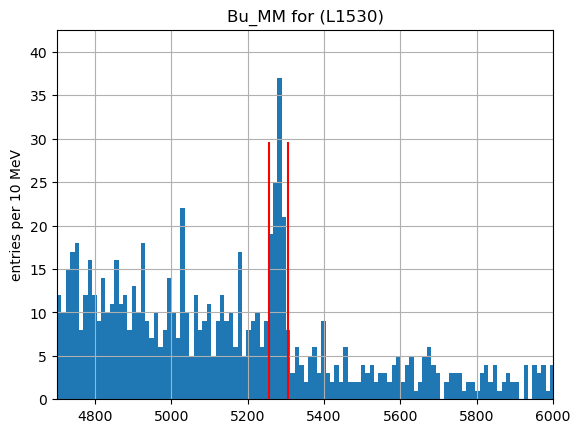

In [122]:
plt.figure()
plt.title('Bu_MM for (L1530)')
nC, bins, patches = plt.hist(Bu_MM[L1530],bins=130, range=(4700,6200))
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.8*max(nC), colors='r')
plt.vlines(5305., 0., 0.8*max(nC), colors='r')
plt.show()

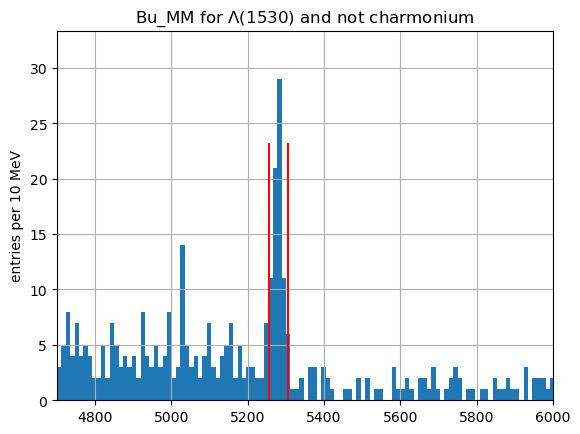

In [125]:
plt.figure()
plt.title(r'Bu_MM for $\Lambda(1530)$ and not charmonium')
nC, bins, patches = plt.hist(Bu_MM[L1530_not_charmonium],bins=130, range=(4700,6200))
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.8*max(nC), colors='r')
plt.vlines(5305., 0., 0.8*max(nC), colors='r')
plt.show()

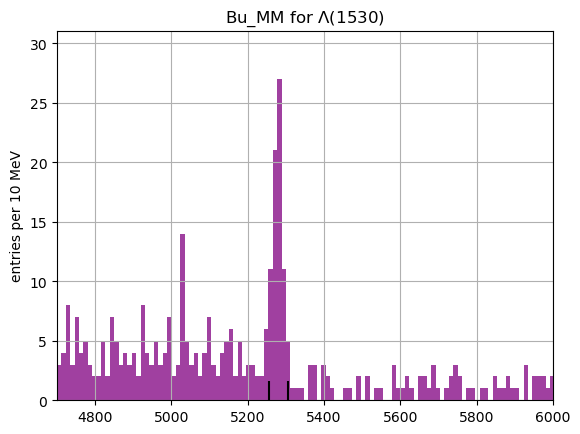

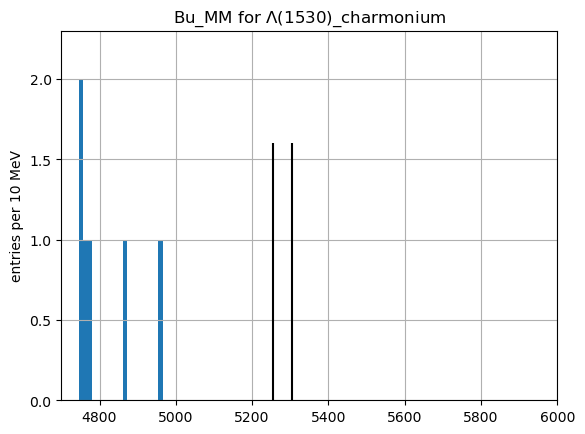

In [124]:
plt.figure()
plt.title(r'Bu_MM for $\Lambda(1530)$')
nC_ex, bins, patches = plt.hist(Bu_MM[L1530ex],bins=130, range=(4700,6200), color='purple', alpha=0.75)
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC_ex)])
plt.grid(True)
plt.vlines(5255., 0., 0.8*max(nC), colors='black')
plt.vlines(5305., 0., 0.8*max(nC), colors='black')
plt.show()

plt.figure()
plt.title(r'Bu_MM for $\Lambda(1530)$_charmonium')
nC, bins, patches = plt.hist(Bu_MM[L1530_charmonium],bins=130, range=(4700,6200))
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.8*max(nC), colors='black')
plt.vlines(5305., 0., 0.8*max(nC), colors='black')
plt.show()

In [96]:
Lx1810 = better_Lambda & good_probNNx  & (pKm_mass>1765.) & (pKm_mass<1855.)
Lx1810ex  = Lx1810 & not_charmonium & not_KK

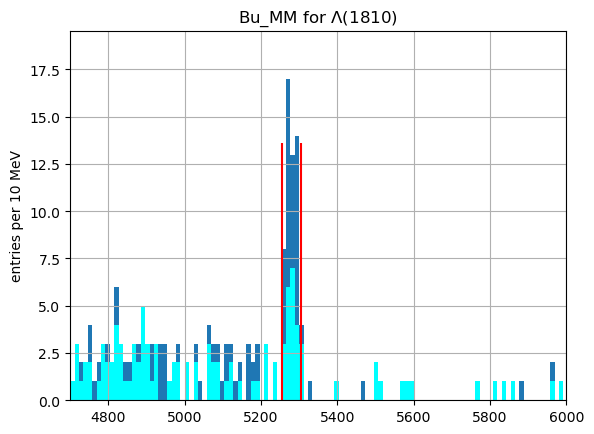

In [126]:
plt.figure()
plt.title(r'Bu_MM for $\Lambda(1810)$')
nC, bins, patches = plt.hist(Bu_MM[Lx1810],bins=130, range=(4700,6200))
nC_ex, bins, patches = plt.hist(Bu_MM[Lx1810ex],bins=130, range=(4700,6200), color='cyan')
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.8*max(nC), colors='red')
plt.vlines(5305., 0., 0.8*max(nC), colors='red')
plt.show()

In [98]:
Lx_tween            = better_Lambda & good_probNNx  & (pKm_mass>1575.) & (pKm_mass<1760.)
Lx_tween_ex         = Lx_tween & not_charmonium & not_KK
Lx_tween_charmonium = Lx_tween & charmonium

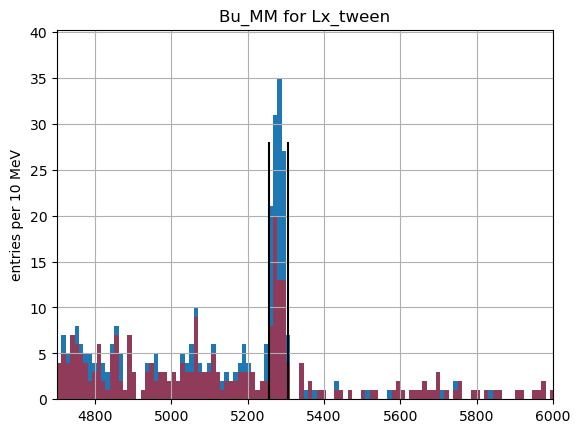

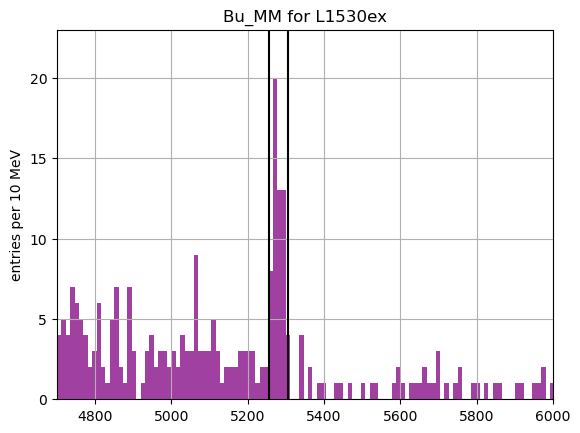

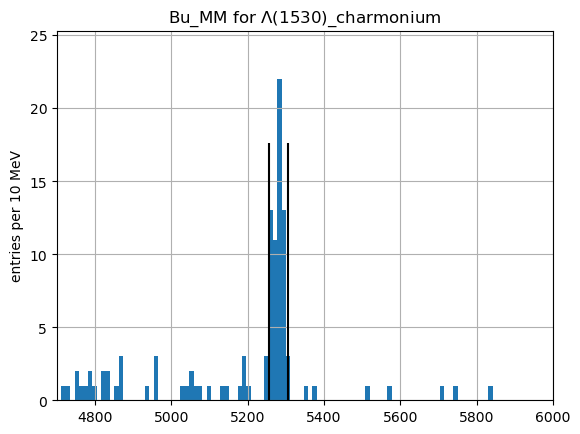

In [127]:
plt.figure()
plt.title('Bu_MM for Lx_tween')
nC, bins, patches = plt.hist(Bu_MM[Lx_tween],bins=130, range=(4700,6200))
nC_ex, bins, patches = plt.hist(Bu_MM[Lx_tween_ex],bins=130, range=(4700,6200), color='red', alpha=0.50)
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.8*max(nC), colors='black')
plt.vlines(5305., 0., 0.8*max(nC), colors='black')
plt.show()

plt.figure()
plt.title('Bu_MM for L1530ex')
nC_ex, bins, patches = plt.hist(Bu_MM[Lx_tween_ex],bins=130, range=(4700,6200), color='purple', alpha=0.75)
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC_ex)])
plt.grid(True)
plt.vlines(5255., 0., 0.8*max(nC), colors='black')
plt.vlines(5305., 0., 0.8*max(nC), colors='black')
plt.show()

plt.figure()
plt.title(r'Bu_MM for $\Lambda(1530)$_charmonium')
nC, bins, patches = plt.hist(Bu_MM[Lx_tween_charmonium],bins=130, range=(4700,6200))
plt.ylabel('entries per 10 MeV')
plt.axis([4700,6000.,0,1.15*max(nC)])
plt.grid(True)
plt.vlines(5255., 0., 0.8*max(nC), colors='black')
plt.vlines(5305., 0., 0.8*max(nC), colors='black')
plt.show()


In [106]:
good_B_not_KK_or_charmonium = better_Lambda & good_probNNx & not_KK & not_charmonium & B_region

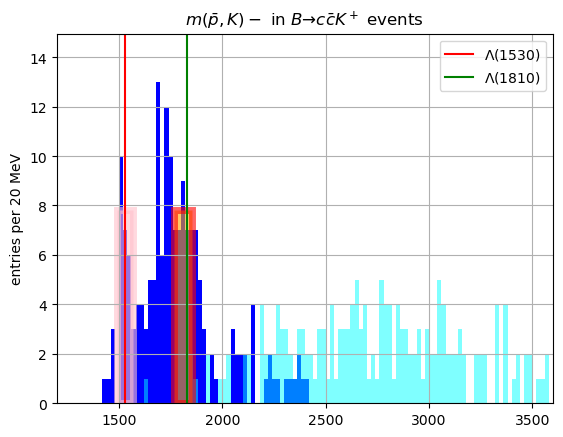

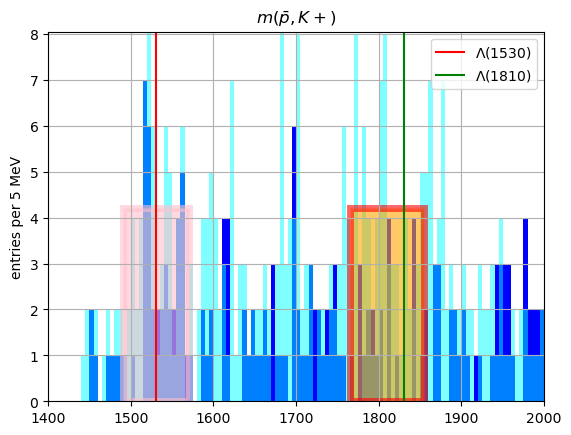

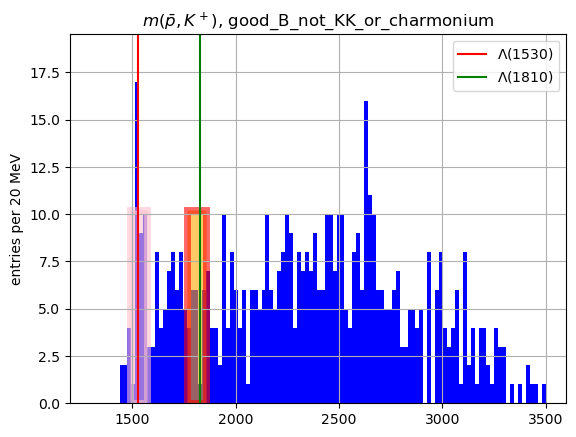

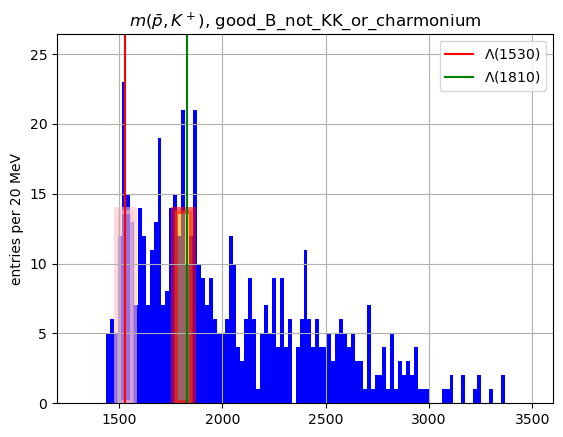

In [141]:
plt.figure()
nC, bins, patches = plt.hist(pKm_mass[better_Lambda & good_probNNx & B_region & charmonium], bins=120, range=(1200.,3600.), color='b')
plt.hist(pKp_mass[better_Lambda & good_probNNx & B_region & charmonium], bins=120, range=(1200.,3600.), color='cyan', alpha=0.50)
plt.title(r'$ m(\bar{p},K ) - $ in $ B \to c \bar c K^+ $ events ' )
plt.axvline(x=1530, ymin=0., ymax=0.95*max(nC), color='r', label=r'$\Lambda(1530)$')
plt.axvline(x=1830, ymin=0., ymax=0.95*max(nC), color='g', label=r'$\Lambda(1810)$')
plt.gca().add_patch(Rectangle((1490, 0), 80, 0.6*max(nC), edgecolor='pink', facecolor='pink', fill=True, lw=5, alpha=0.60))
plt.gca().add_patch(Rectangle((1765, 0), 90, 0.6*max(nC), edgecolor='red', facecolor='orange', fill=True, lw=5, alpha=0.60))
plt.ylabel('entries per 20 MeV')
plt.axis([1200.,3600.,0,1.15*max(nC)])
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
nC, bins, patches = plt.hist(pKm_mass[good_B_not_KK_or_charmonium], bins=120, range=(1400.,2000.), color='b')
plt.hist(pKp_mass[good_B_not_KK_or_charmonium], bins=120, range=(1400.,2000.), color='cyan', alpha=0.50)
plt.title(r'$ m(\bar{p},K+ )$' )
plt.axvline(x=1530, ymin=0., ymax=0.95*max(nC), color='r', label=r'$\Lambda(1530)$')
plt.axvline(x=1830, ymin=0., ymax=0.95*max(nC), color='g', label=r'$\Lambda(1810)$')
plt.gca().add_patch(Rectangle((1490, 0), 80, 0.6*max(nC), edgecolor='pink', facecolor='pink', fill=True, lw=5, alpha=0.60))
plt.gca().add_patch(Rectangle((1765, 0), 90, 0.6*max(nC), edgecolor='red', facecolor='orange', fill=True, lw=5, alpha=0.60))
plt.ylabel('entries per 5 MeV')
plt.axis([1400.,2000.,0,1.15*max(nC)])
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.title(r'$ m(\bar{p},K^+) $, good_B_not_KK_or_charmonium')
nC, bins, patches = plt.hist(pKm_mass[good_B_not_KK_or_charmonium], bins=110, range=(1400.,3500.), color='b')
plt.axvline(x=1530, ymin=0., ymax=0.95*max(nC), color='r', label=r'$\Lambda(1530)$')
plt.axvline(x=1830, ymin=0., ymax=0.95*max(nC), color='g', label=r'$\Lambda(1810)$')
plt.gca().add_patch(Rectangle((1490, 0), 80, 0.6*max(nC), edgecolor='pink', facecolor='pink', fill=True, lw=5, alpha=0.60))
plt.gca().add_patch(Rectangle((1765, 0), 90, 0.6*max(nC), edgecolor='red', facecolor='orange', fill=True, lw=5, alpha=0.60))
plt.ylabel('entries per 20 MeV')
plt.axis([1200.,3600.,0,1.15*max(nC)])
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.title(r'$ m(\bar{p},K^+) $, good_B_not_KK_or_charmonium')
nC, bins, patches = plt.hist(pKp_mass[good_B_not_KK_or_charmonium], bins=110, range=(1400.,3500.), color='b')
plt.axvline(x=1530, ymin=0., ymax=0.95*max(nC), color='r', label=r'$\Lambda(1530)$')
plt.axvline(x=1830, ymin=0., ymax=0.95*max(nC), color='g', label=r'$\Lambda(1810)$')
plt.gca().add_patch(Rectangle((1490, 0), 80, 0.6*max(nC), edgecolor='pink', facecolor='pink', fill=True, lw=5, alpha=0.60))
plt.gca().add_patch(Rectangle((1765, 0), 90, 0.6*max(nC), edgecolor='red', facecolor='orange', fill=True, lw=5, alpha=0.60))
plt.ylabel('entries per 20 MeV')
plt.axis([1200.,3600.,0,1.15*max(nC)])
plt.legend()
plt.grid(True)
plt.show()


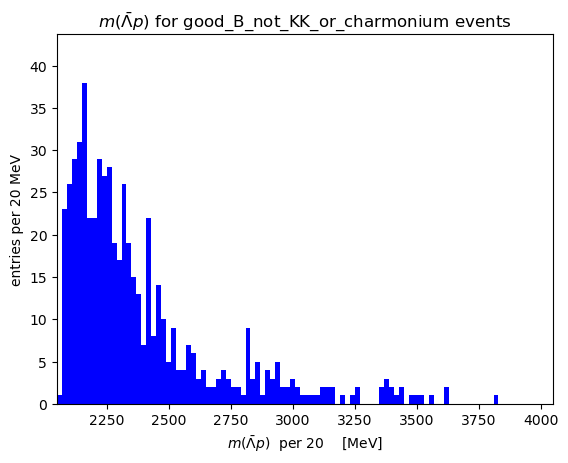

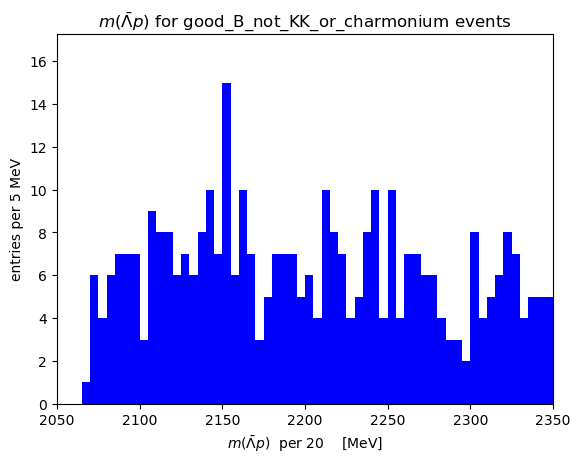

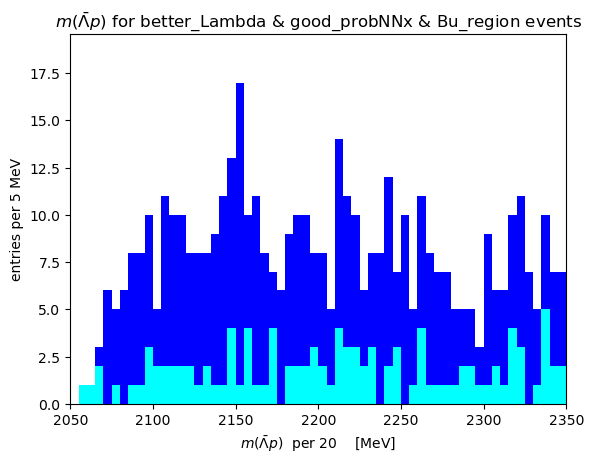

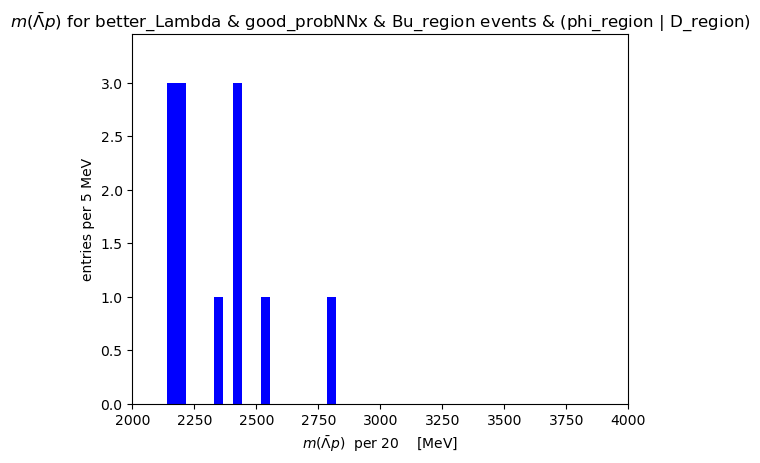

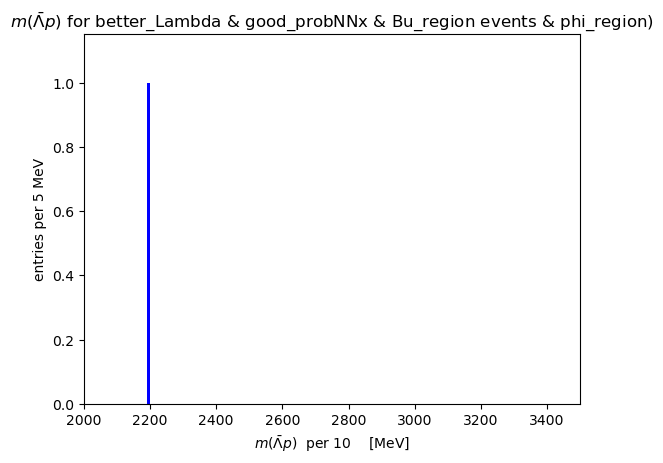

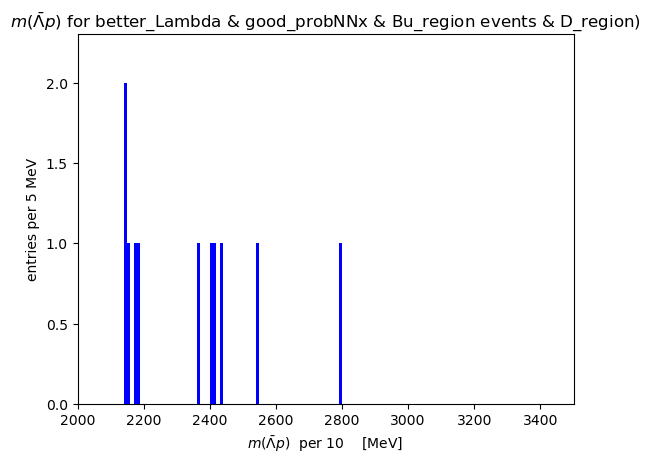

In [110]:
plt.figure()
plt.title(r'$m(\bar \Lambda p)$ for good_B_not_KK_or_charmonium events')
nC, bins, patches = plt.hist(Lbarp_mass[good_B_not_KK_or_charmonium], bins=100, range=(2050,4050), color='blue')
plt.xlabel(r'$m(\bar \Lambda p)$  per 20    [MeV]')
plt.ylabel('entries per 20 MeV')
plt.axis([2050,4050,0.,1.15*max(nC)])
plt.show()

plt.figure()
plt.title(r'$m(\bar \Lambda p)$ for good_B_not_KK_or_charmonium events')
nC, bins, patches = plt.hist(Lbarp_mass[good_B_not_KK_or_charmonium], bins=60, range=(2050,2350), color='blue')
plt.xlabel(r'$m(\bar \Lambda p)$  per 20    [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([2050,2350,0.,1.15*max(nC)])
plt.show()

plt.figure()
plt.title(r'$m(\bar \Lambda p)$ for better_Lambda & good_probNNx & Bu_region events')
nC, bins, patches = plt.hist(Lbarp_mass[better_Lambda & good_probNNx & B_region], bins=60, range=(2050,2350), color='blue')
nC_charmonium, bins, patches = plt.hist(Lbarp_mass[better_Lambda & good_probNNx & B_region & charmonium], bins=60, range=(2050,2350), color='cyan')
plt.xlabel(r'$m(\bar \Lambda p)$  per 20    [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([2050,2350,0.,1.15*max(nC)])
plt.show()

plt.figure()
plt.title(r'$m(\bar \Lambda p)$ for better_Lambda & good_probNNx & Bu_region events & (phi_region | D_region)')
nC, bins, patches = plt.hist(Lbarp_mass[better_Lambda & good_probNNx & B_region & (phi_region | D_region)], bins=100, range=(200,4000), color='blue')
plt.xlabel(r'$m(\bar \Lambda p)$  per 20    [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([2000,4000,0.,1.15*max(nC)])
plt.show()

plt.figure()
plt.title(r'$m(\bar \Lambda p)$ for better_Lambda & good_probNNx & Bu_region events & phi_region)')
nC, bins, patches = plt.hist(Lbarp_mass[better_Lambda & good_probNNx & B_region & phi_region], bins=150, range=(2000,3500), color='blue')
plt.xlabel(r'$m(\bar \Lambda p)$  per 10    [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([2000,3500,0.,1.15*max(nC)])
plt.show()

plt.figure()
plt.title(r'$m(\bar \Lambda p)$ for better_Lambda & good_probNNx & Bu_region events & D_region)')
nC, bins, patches = plt.hist(Lbarp_mass[better_Lambda & good_probNNx & B_region & D_region], bins=150, range=(2000,3500), color='blue')
plt.xlabel(r'$m(\bar \Lambda p)$  per 10    [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([2000,3500,0.,1.15*max(nC)])
plt.show()

xEdges =  [2000. 2100. 2200. 2300. 2400. 2500. 2600. 2700. 2800. 2900. 3000. 3100.
 3200. 3300. 3400. 3500. 3600. 3700. 3800. 3900. 4000. 4100.]
yEdges =  [2000. 2100. 2200. 2300. 2400. 2500. 2600. 2700. 2800. 2900. 3000. 3100.
 3200. 3300. 3400. 3500. 3600. 3700. 3800. 3900. 4000. 4100.]


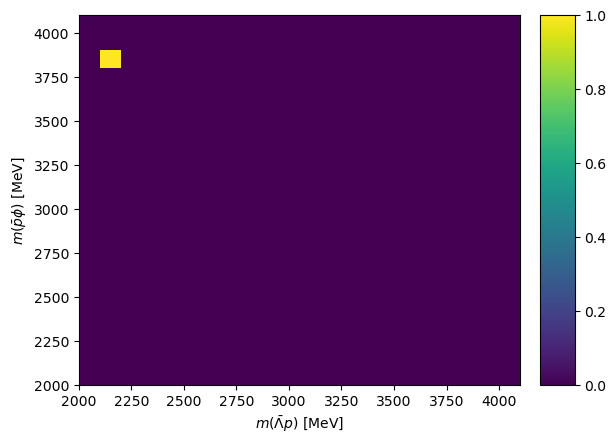

In [111]:
xEdges = np.arange(2000.,4200.,100.)  ## Lbar,p inv. mass; recall that third arg is step size
print('xEdges = ',xEdges)
yEdges = np.arange(2000.,4200.,100.)  ## pKK inv. mass <--> p,phi mass if phi --> K,K
print('yEdges = ',yEdges)

plt.figure()
plt.xlabel(r'$ m ( \bar \Lambda p ) $ [MeV]')
plt.ylabel(r'$ m ( \bar p \phi ) $ [MeV]')
xVal = np.asarray(Lbarp_mass[better_Lambda & good_probNNx & B_region & phi_region])
yVal = np.asarray(pKK_mass[better_Lambda & good_probNNx & B_region & phi_region])

Lbar_p_phi_masses, xEdges, yEdges = np.histogram2d(xVal,yVal,bins=(xEdges,yEdges))

hep.hist2dplot(Lbar_p_phi_masses,xEdges,yEdges)
plt.show()

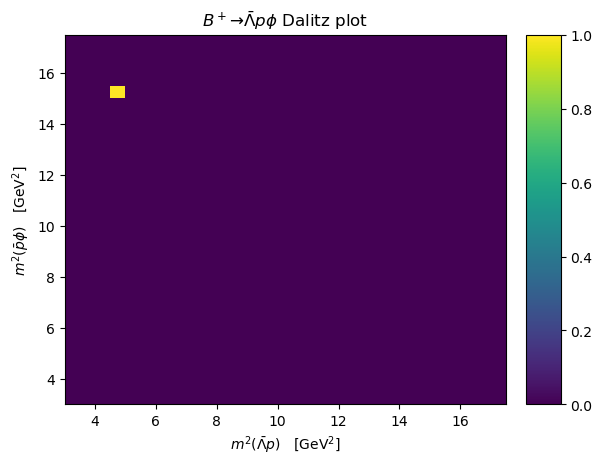

In [112]:
Lbarp_mass_GeV = 0.001*(Lbarp_mass[better_Lambda & good_probNNx & B_region & phi_region])
pKK_mass_Gev   = 0.001*(pKK_mass[better_Lambda & good_probNNx & B_region & phi_region])

Lbarp_mass_sq  =  np.square(Lbarp_mass_GeV)
pphi_mass_sq   = np.square(pKK_mass_Gev)

xVal = np.asarray(Lbarp_mass_sq)  ## convert from ak to np
yVal = np.asarray(pphi_mass_sq)

##print('xVal = ',xVal)
##print('yVal = ',yVal)


xEdges = np.arange(3.0,18.0,0.5)
yEdges = np.arange(3.0,18.0,0.5)

DP, xEdges, yEdges = np.histogram2d(xVal,yVal,bins=(xEdges,yEdges))

hep.hist2dplot(DP,xEdges,yEdges)
plt.title(r'$ B^+ \to \bar \Lambda p \phi $ Dalitz plot ')
plt.xlabel(r'$ m ^2( \bar \Lambda p )  \ \ \ [{\rm GeV}^2] $')
plt.ylabel(r'$ m ^2( \bar p \phi ) \ \ \  [{\rm GeV}^2] $')
plt.show()


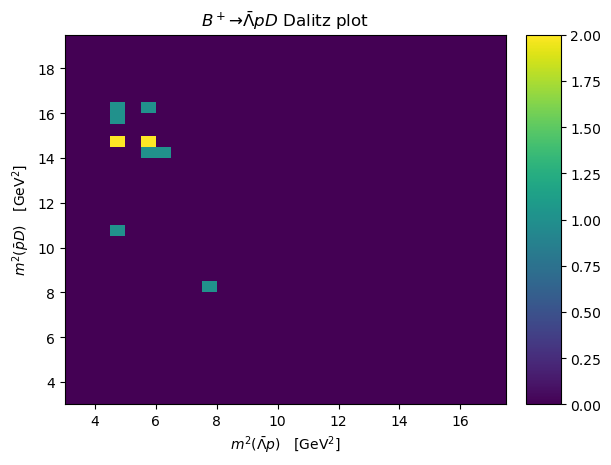

In [113]:
Lbarp_mass_GeV = 0.001*(Lbarp_mass[better_Lambda & good_probNNx & B_region & D_region])
pKK_mass_Gev   = 0.001*(pKK_mass[better_Lambda & good_probNNx & B_region & D_region])

Lbarp_mass_sq  =  np.square(Lbarp_mass_GeV)
pphi_mass_sq   = np.square(pKK_mass_Gev)

xVal = np.asarray(Lbarp_mass_sq)  ## convert from ak to np
yVal = np.asarray(pphi_mass_sq)

##print('xVal = ',xVal)
##print('yVal = ',yVal)


xEdges = np.arange(3.0,18.0,0.5)
yEdges = np.arange(3.0,20.0,0.5)

DP, xEdges, yEdges = np.histogram2d(xVal,yVal,bins=(xEdges,yEdges))

hep.hist2dplot(DP,xEdges,yEdges)
plt.title(r'$ B^+ \to \bar \Lambda p D $ Dalitz plot ')
plt.xlabel(r'$ m ^2( \bar \Lambda p )  \ \ \ [{\rm GeV}^2] $')
plt.ylabel(r'$ m ^2( \bar p D ) \ \ \  [{\rm GeV}^2] $')
plt.show()


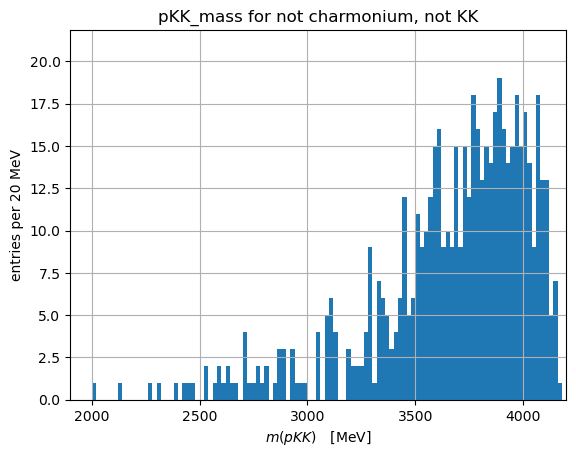

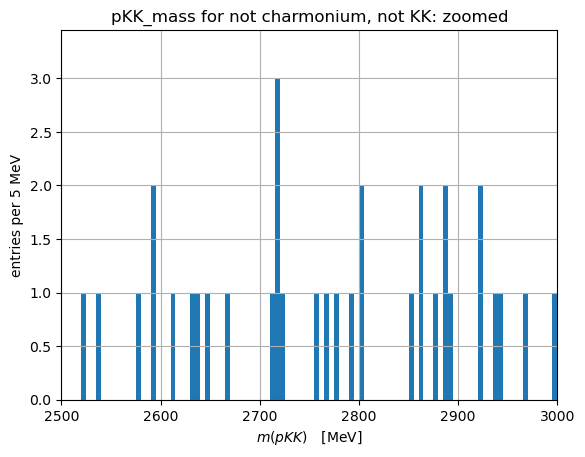

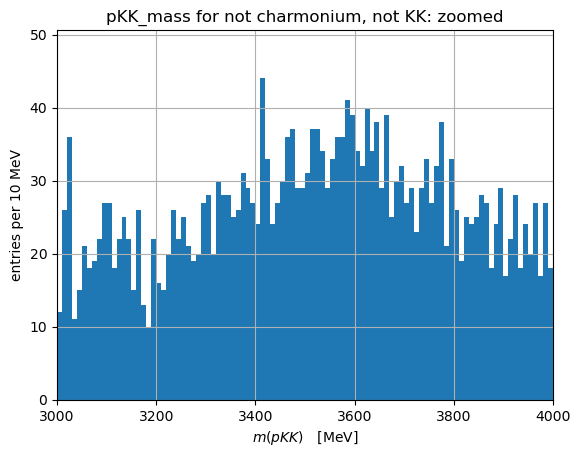

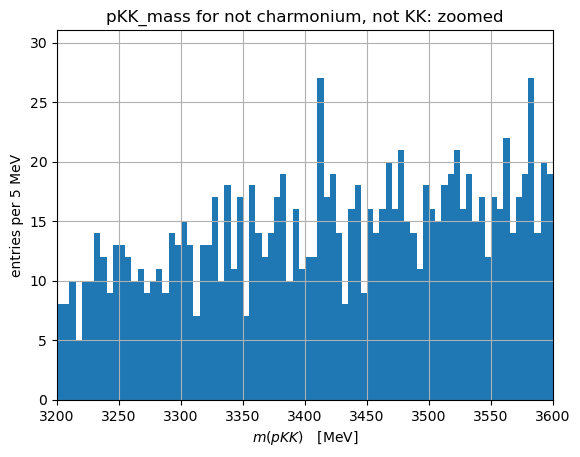

In [105]:
plt.figure()
plt.title('pKK_mass for not charmonium, not KK')
nC, bins, patches = plt.hist(pKK_mass[better_Lambda & B_region & good_probNNx & not_KK & not_charmonium],bins=115, range=(1900,4200))
plt.xlabel(r'$ m(pKK) $   [MeV]')
plt.ylabel('entries per 20 MeV')
plt.axis([1900.,4200.,0,1.15*max(nC)])
plt.grid(True)
##plt.vlines(5255., 0., 0.8*max(nC), colors='red')
##plt.vlines(5305., 0., 0.8*max(nC), colors='red')
plt.show()

plt.figure()
plt.title('pKK_mass for not charmonium, not KK: zoomed')
nC, bins, patches = plt.hist(pKK_mass[better_Lambda & B_region & good_probNNx & not_KK & not_charmonium],bins=100, range=(2500.,3000.))
plt.xlabel(r'$ m(pKK) $   [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([2500.,3000.,0,1.15*max(nC)])
plt.grid(True)
##plt.vlines(5255., 0., 0.8*max(nC), colors='red')
##plt.vlines(5305., 0., 0.8*max(nC), colors='red')
plt.show()

plt.figure()
plt.title('pKK_mass for not charmonium, not KK: zoomed')
nC, bins, patches = plt.hist(pKK_mass[not_charmonium],bins=100, range=(3000.,4000.))
plt.xlabel(r'$ m(pKK) $   [MeV]')
plt.ylabel('entries per 10 MeV')
plt.axis([3000.,4000.,0,1.15*max(nC)])
plt.grid(True)
##plt.vlines(5255., 0., 0.8*max(nC), colors='red')
##plt.vlines(5305., 0., 0.8*max(nC), colors='red')
plt.show()

plt.figure()
plt.title('pKK_mass for not charmonium, not KK: zoomed')
nC, bins, patches = plt.hist(pKK_mass[not_charmonium],bins=80, range=(3200.,3600.))
plt.xlabel(r'$ m(pKK) $   [MeV]')
plt.ylabel('entries per 5 MeV')
plt.axis([3200.,3600.,0,1.15*max(nC)])
plt.grid(True)
##plt.vlines(5255., 0., 0.8*max(nC), colors='red')
##plt.vlines(5305., 0., 0.8*max(nC), colors='red')
plt.show()